<a href="https://colab.research.google.com/github/samuelflores/deep-learning-RNA-structure-prediction/blob/main/pyDCA_PRC_Sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import math
from numpy import asarray
from numpy import save
from numpy import load

from sklearn.preprocessing import StandardScaler
import os
import tempfile


import matplotlib as mpl
import sklearn

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot( recall, precision, label=name, linewidth=2, **kwargs)
    plt.ylabel('Precision = TP/(TP+FP)')
    plt.xlabel('Recall = TP/(TP + FN)')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [264]:
#df = pd.read_csv('./drive/MyDrive/deep-learning-RNA-structure-prediction/Floyd_Scripts_and_Figs/labeledfrequenciesanddca_april_26.csv')
#On sam's drive, the path is different:
df = pd.read_csv('/Users/samuel/github/deep-learning-RNA-structure-prediction-github/Floyd_Scripts_and_Figs/./labeledfrequenciesanddca_april_26.csv')


df['i'] = df['index'].str.split(pat=':', n=1, expand=True)[0] # n=1 because we only need one column, the first one. I anyway specify index [0]
df['j'] = df['index'].str.split(pat=':', n=2, expand=True)[1] # take everything AFTER the ":". hence two columns, of which i take the second, [1]
df['j'] = df['j'].str[:-4] # then remove last 4 chars

df['i'] = df['i'].astype(int)
df['j'] = df['j'].astype(int)



df['pdb'] = df['index'].str.slice(start=-4)
print("df.shape before culling:")
print(df.shape)
df = df.drop(df[df['i'] > df['j']-3].index)
print("df.shape AFTER culling:")
print(df.shape)

print ("index:" )
print(df['index'])
print ("i: ")
print(df['i'])
print ("j: ")
print(df['j'])
print ("pdb: ")
print( df['pdb'])


df.shape before culling:
(1623417, 32)
df.shape AFTER culling:
(790256, 32)
index:
3            1:43D2G
4            1:53D2G
5            1:63D2G
6            1:73D2G
7            1:83D2G
             ...    
1622995    79:834FRG
1622996    79:844FRG
1623079    80:834FRG
1623080    80:844FRG
1623164    81:844FRG
Name: index, Length: 790256, dtype: object
i: 
3           1
4           1
5           1
6           1
7           1
           ..
1622995    79
1622996    79
1623079    80
1623080    80
1623164    81
Name: i, Length: 790256, dtype: int64
j: 
3           4
4           5
5           6
6           7
7           8
           ..
1622995    83
1622996    84
1623079    83
1623080    84
1623164    84
Name: j, Length: 790256, dtype: int64
pdb: 
3          3D2G
4          3D2G
5          3D2G
6          3D2G
7          3D2G
           ... 
1622995    4FRG
1622996    4FRG
1623079    4FRG
1623080    4FRG
1623164    4FRG
Name: pdb, Length: 790256, dtype: object


In [265]:

badPdbs = ['4RZD','4P95','4R4V','2KRL','1P6V','2N1Q','3BWP','2LC8','3T4B','6FZ0','3ZP8','4PLX','5M0H','4R0D','4GMA','5ZAL'
]
print("df.shape before culling:")
print(df.shape)
#for badPdb in badPdbs:
    #df=df.drop(df[df['pdb']==badPdb].index)
print("df.shape AFTER culling:")
print(df.shape)

df.shape before culling:
(790256, 32)
df.shape AFTER culling:
(790256, 32)


In [266]:
df['bond_type'].values[df['bond_type']>0] = 1

In [267]:
set(df.bond_type)

{0, 1}

In [268]:
scaler = preprocessing.MinMaxScaler()
dca = df[['dca_val']]

In [269]:
y = scaler.fit_transform(dca)

In [270]:
#df

In [271]:
df.nlargest(n=10, columns=["dca_val"]) #.bond_type.values()


,index,GA,GG,GC,GU,G-,CC,CU,CG,CA,...,-C,-U,-G,-A,bond_type,dca_val,file2,i,j,pdb
524991,29:411EHZ,0.0000,0.0000,0.3372,0.0063,0.0000,0.0010,0.0000,0.1288,0.0021,...,0.0000,0.0000,0.0000,0.0000,1,4.906716,1EHZ,29,41,1EHZ
160235,33:413RG5,0.0004,0.0000,0.2750,0.0021,0.0004,0.0000,0.0004,0.0326,0.0000,...,0.0004,0.0000,0.0000,0.0000,1,4.764795,3RG5,33,41,3RG5
1592764,69:781Z43,0.0029,0.0002,0.2891,0.0002,0.0000,0.0000,0.0002,0.1229,0.0000,...,0.0000,0.0000,0.0000,0.0002,1,4.654802,1Z43,69,78,1Z43
176456,56:684GMA,0.0002,0.0000,0.0936,0.0044,0.0002,0.0001,0.0003,0.6656,0.0009,...,0.0001,0.0001,0.0007,0.0002,0,4.640454,4GMA,56,68,4GMA
627810,18:236CB3,0.0024,0.0012,0.1813,0.0024,0.0012,0.0024,0.0000,0.2161,0.0000,...,0.0000,0.0000,0.0000,0.0000,1,4.623609,6CB3,18,23,6CB3
155662,42:561P6V,0.0000,0.0004,0.3276,0.0000,0.0072,0.0021,0.0001,0.4826,0.0003,...,0.0001,0.0000,0.0000,0.0000,0,4.623278,1P6V,42,56,1P6V
175828,53:704GMA,0.0065,0.0012,0.3764,0.0079,0.0000,0.0001,0.0000,0.1772,0.0006,...,0.0004,0.0001,0.0002,0.0004,0,4.551678,4GMA,53,70,4GMA
183890,91:1524GMA,0.0013,0.0007,0.1512,0.0044,0.0021,0.0006,0.0008,0.5529,0.0024,...,0.0006,0.0001,0.0006,0.0005,0,4.529522,4GMA,91,152,4GMA
3989,52:633D2G,0.0003,0.0002,0.0242,0.0047,0.0000,0.0001,0.0006,0.5137,0.0010,...,0.0000,0.0000,0.0002,0.0010,1,4.512157,3D2G,52,63,3D2G
1069971,7:171U9S,0.0002,0.0006,0.5842,0.0003,0.0002,0.0002,0.0000,0.0539,0.0003,...,0.0006,0.0002,0.0000,0.0000,1,4.497591,1U9S,7,17,1U9S


In [272]:
topN = 10
print(sum(df.nlargest(n=topN, columns=["dca_val"]).bond_type.values)/topN)

0.6


In [273]:
mpl.rcParams['figure.figsize'] = (15, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

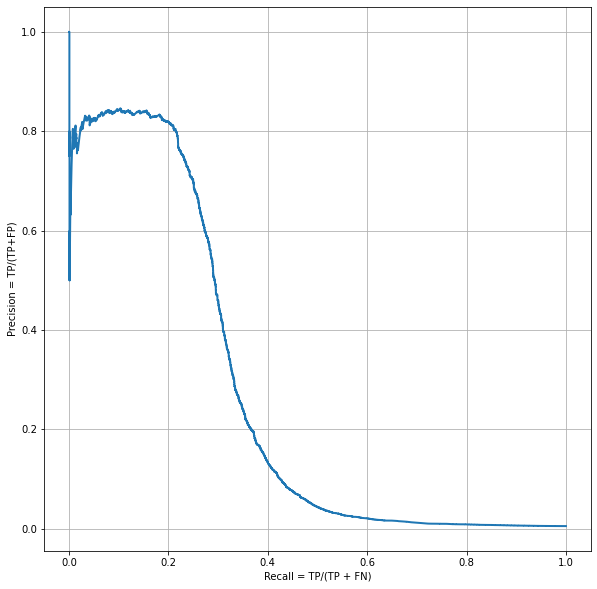

In [274]:
plot_prc('pyDCA', df.bond_type, y)

In [237]:
display = PrecisionRecallDisplay.from_predictions(df.bond_type, y, name="pyDCA")
_ = display.ax_.set_title("2-class Precision-Recall curve")

AttributeError: type object 'PrecisionRecallDisplay' has no attribute 'from_predictions'

myPdbs.shape =  80
['3D2G' '4RZD' '3Q3Z' '4P95' '1GID' '4R4V' '5KPY' '3F2Q' '6HAG' '2KRL'
 '5U3G' '1P6V' '3RG5' '4GMA' '1XJR' '5T5A' '2H0S' '5NWQ' '4PQV' '2N1Q'
 '4Y1O' '4L81' '2NBX' '2MF0' '3BWP' '1EHZ' '1NBS' '4RUM' '2LC8' '4C4Q'
 '1L9A' '6CB3' '1KXK' '4JRC' '3NKB' '4ENC' '4JF2' '4QLN' '4TZX' '3T4B'
 '4YAZ' '5LYS' '3GX5' '3SLQ' '6FZ0' '4WFL' '2IL9' '6UES' '4LVV' '1S9S'
 '5DDP' '4P5J' '3PDR' '5OB3' '3ZP8' '2OIU' '1FFZ' '1Z2J' '6QN3' '1U9S'
 '3DIL' '4PLX' '2KE6' '5K7D' '5M0H' '3NDB' '4XWF' '3R4F' '5DI2' '6OL3'
 '5ZAL' '4R0D' '3OX0' '6CU1' '3E5C' '1Z43' '1C2X' '5DUN' '4K27' '4FRG']


/var/folders/0y/0v6zbkk16wd_7cn71mpgjbj00000gn/T/ipykernel_8748/671899364.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


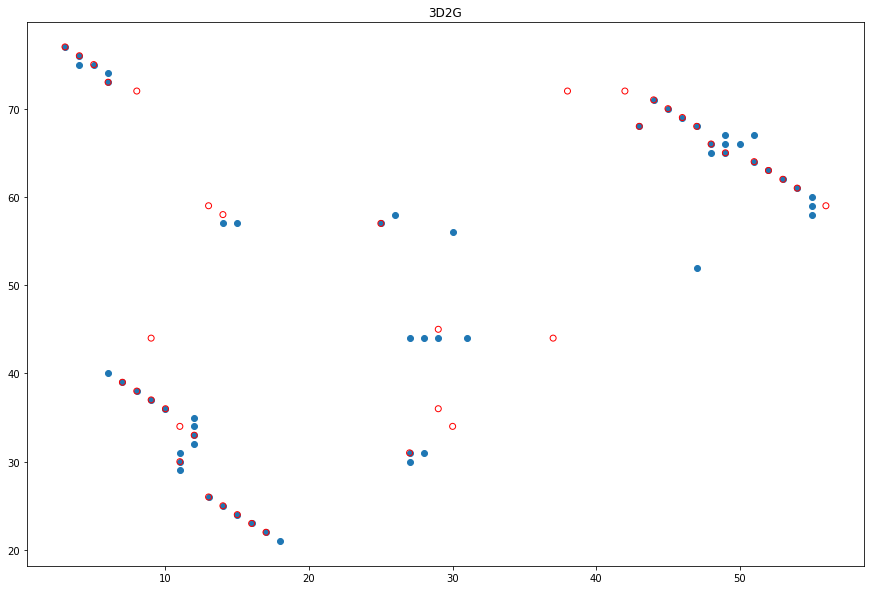

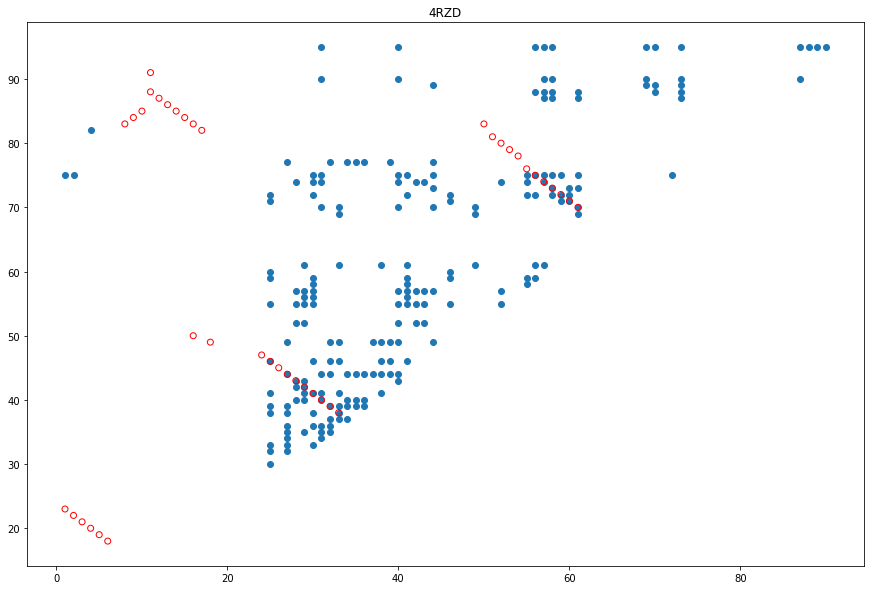

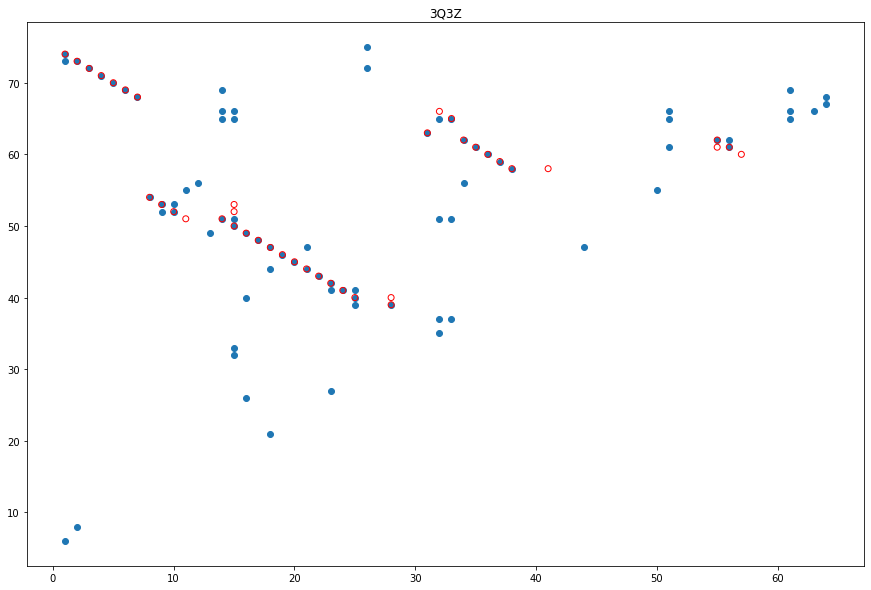

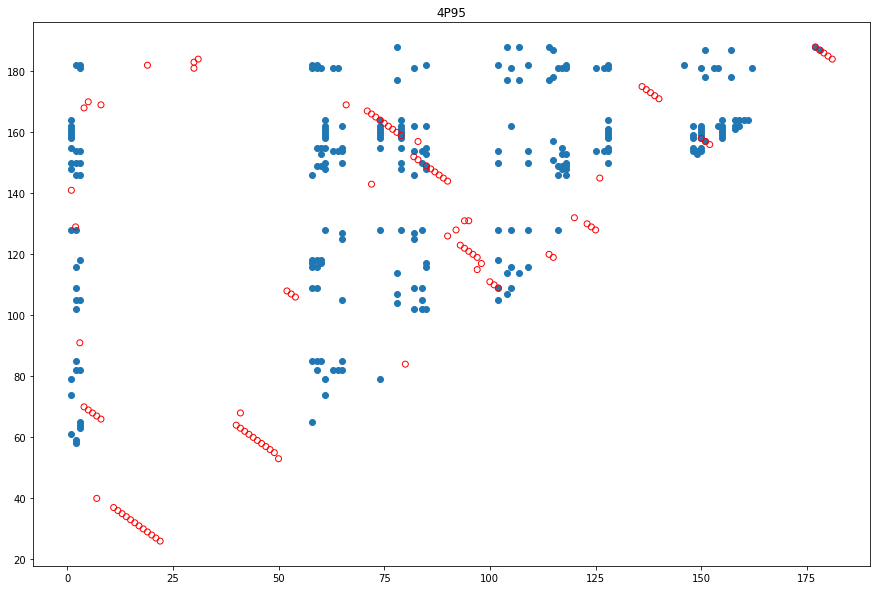

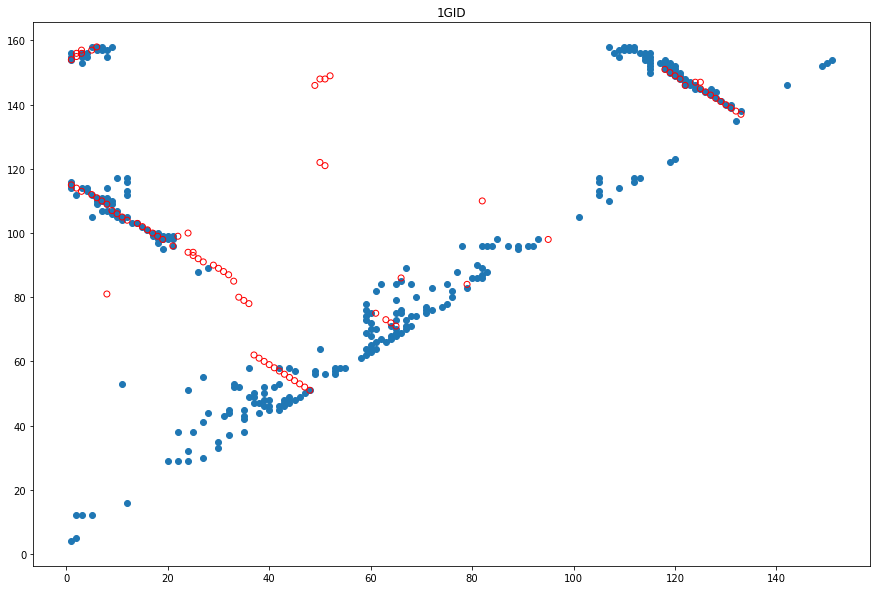

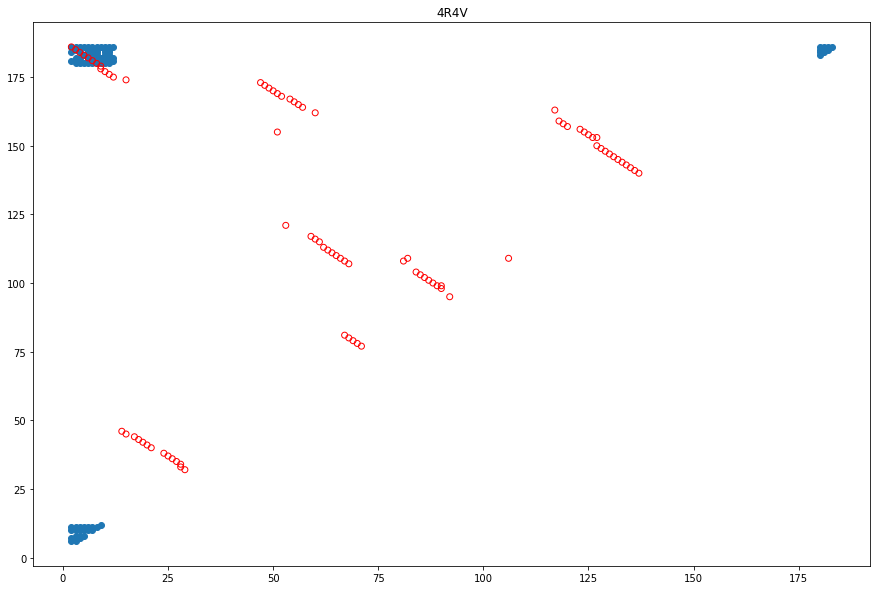

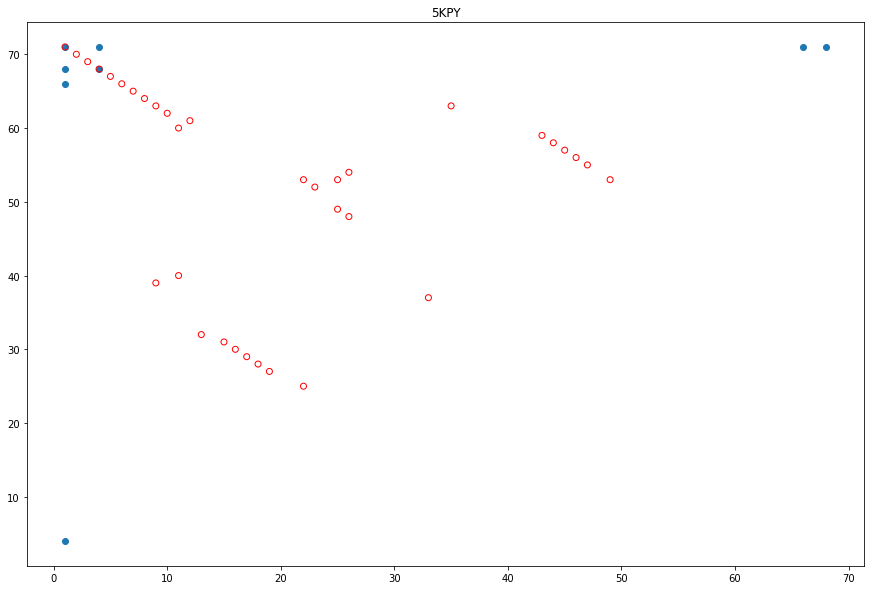

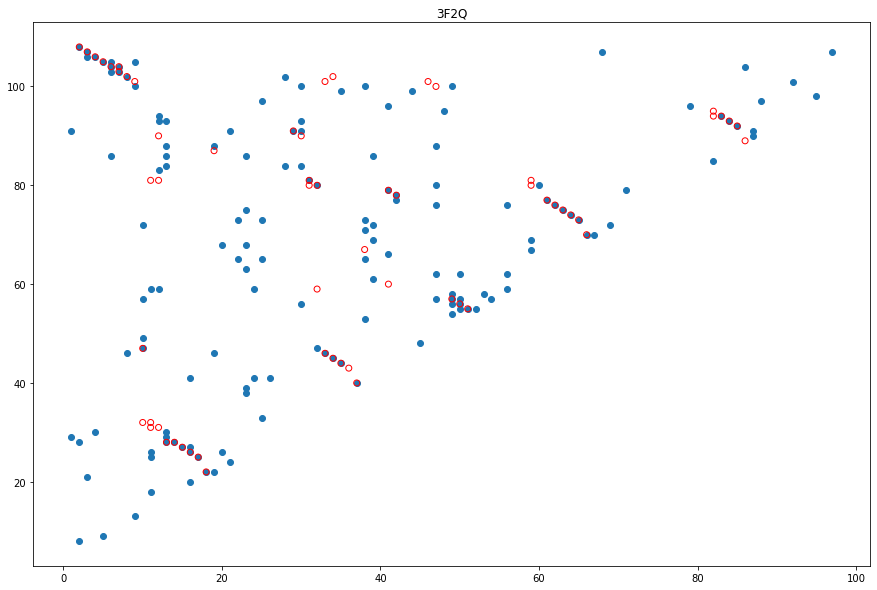

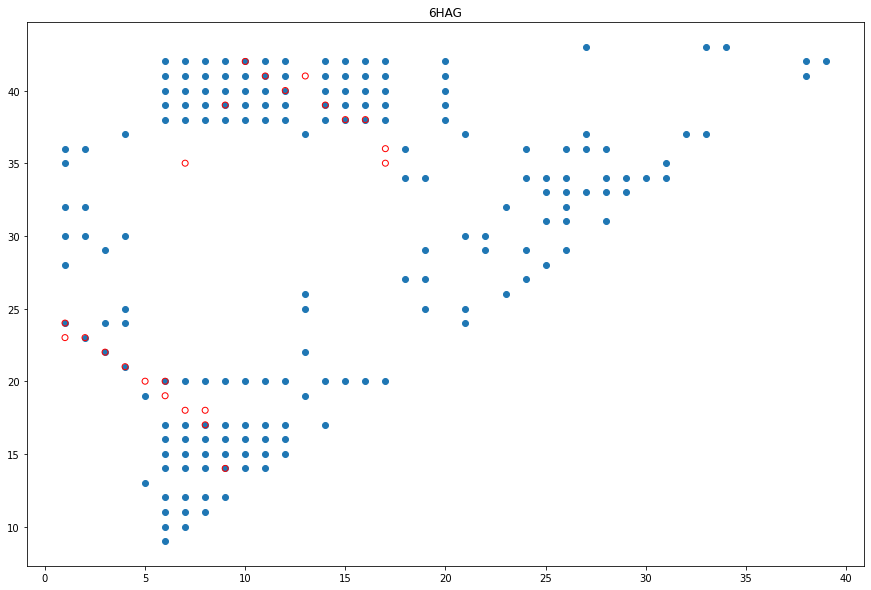

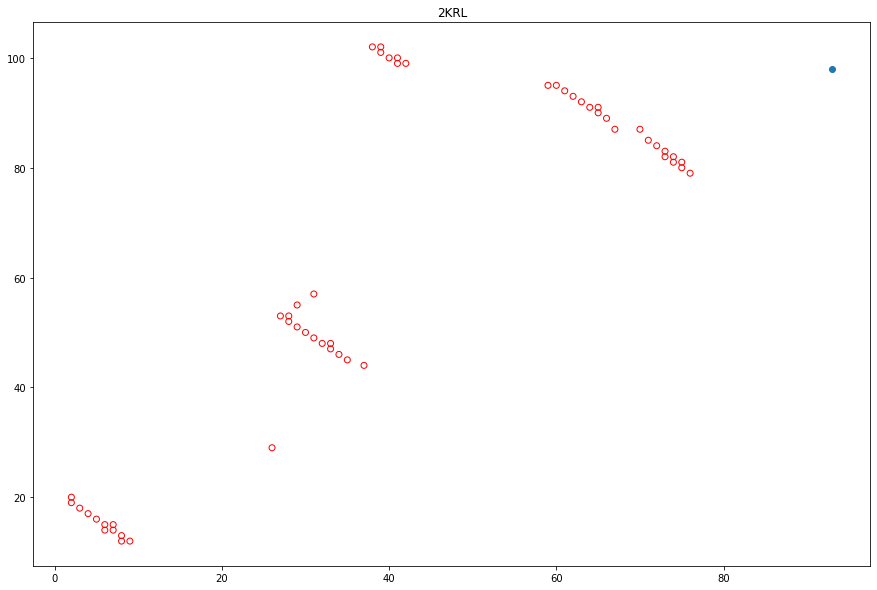

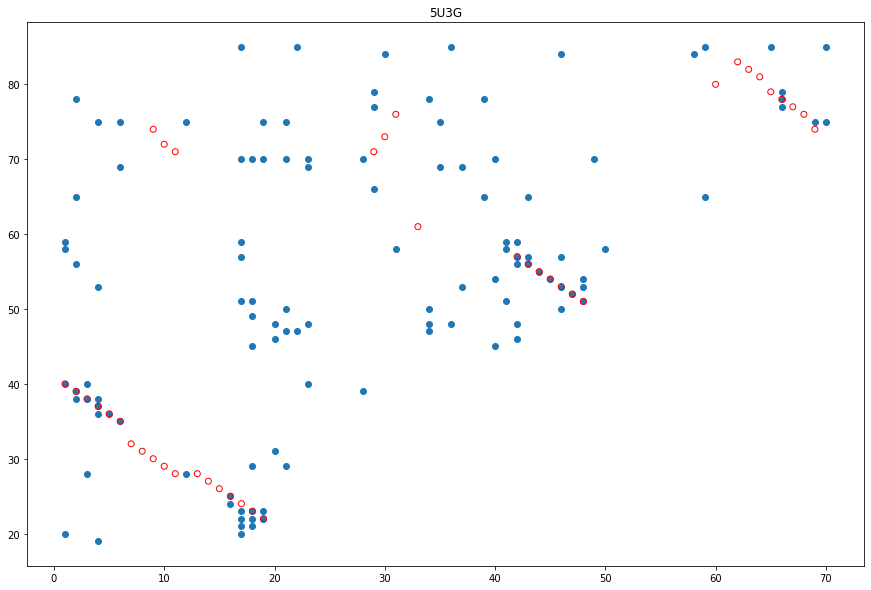

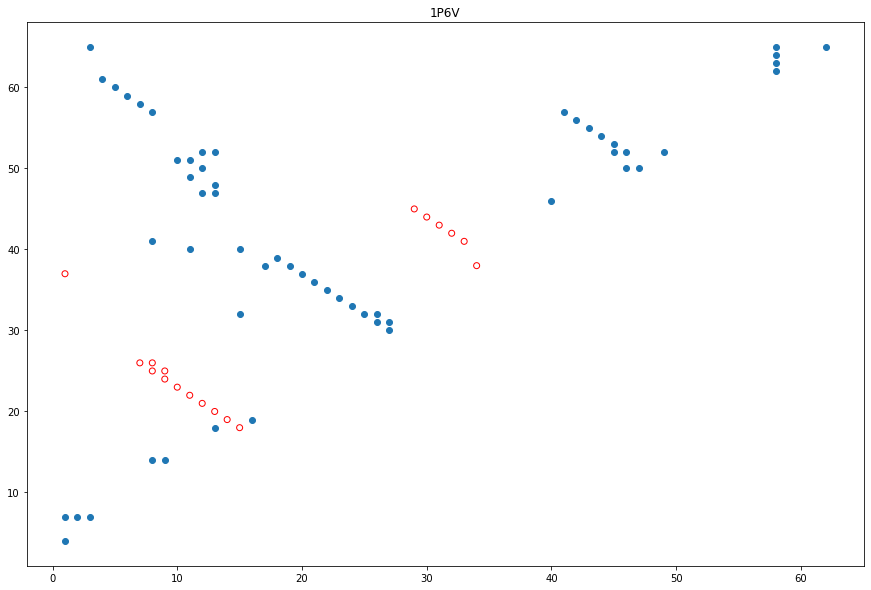

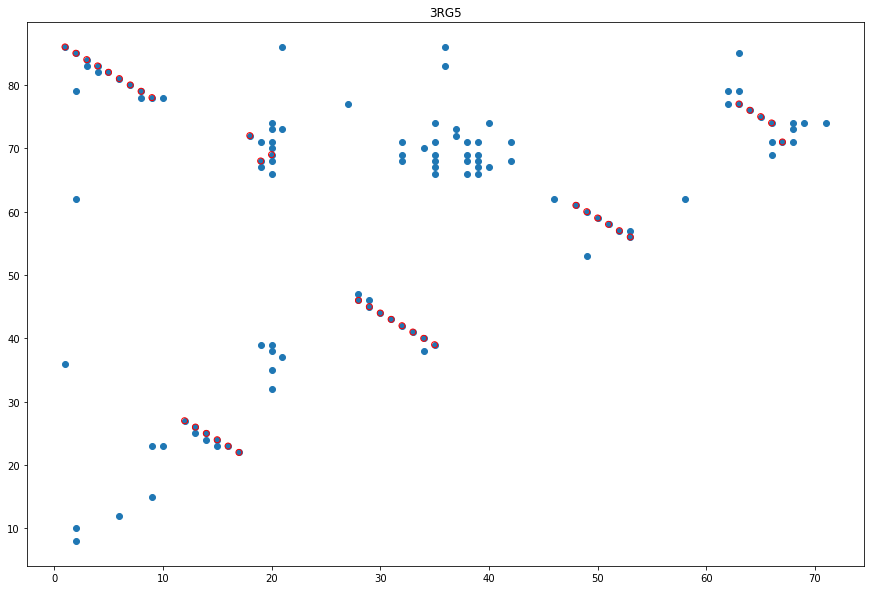

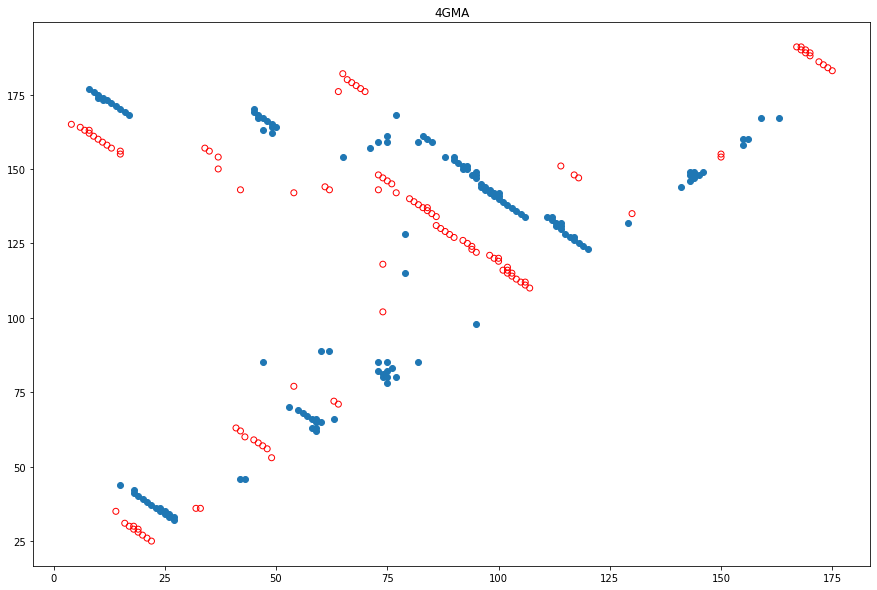

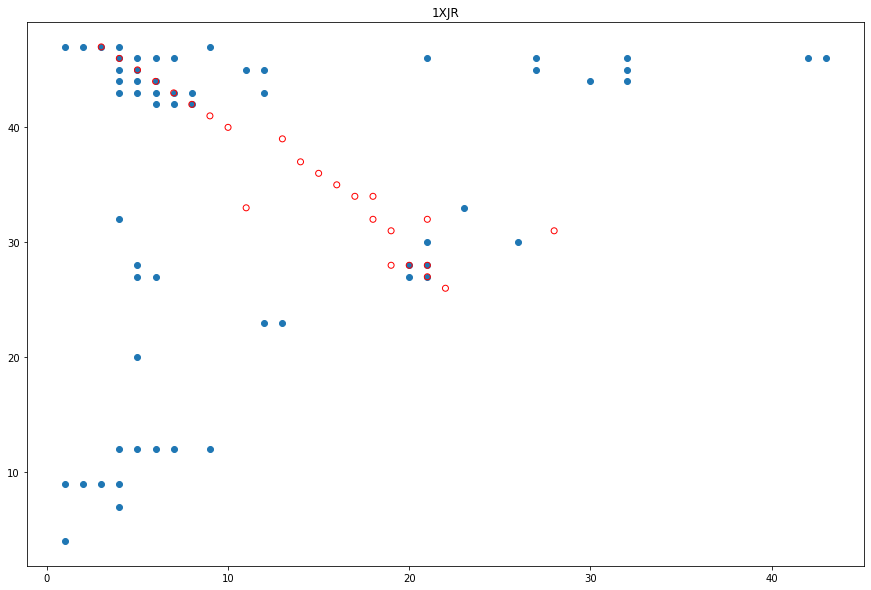

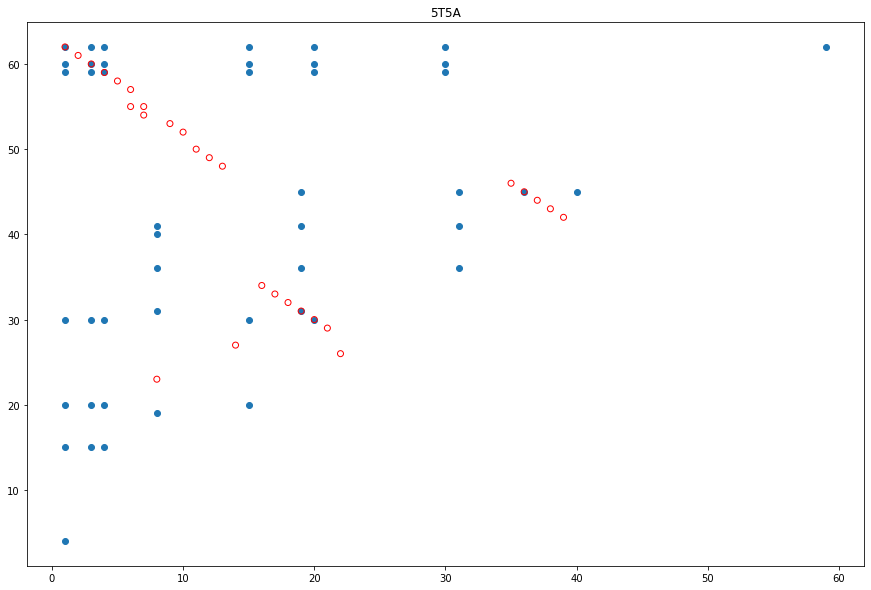

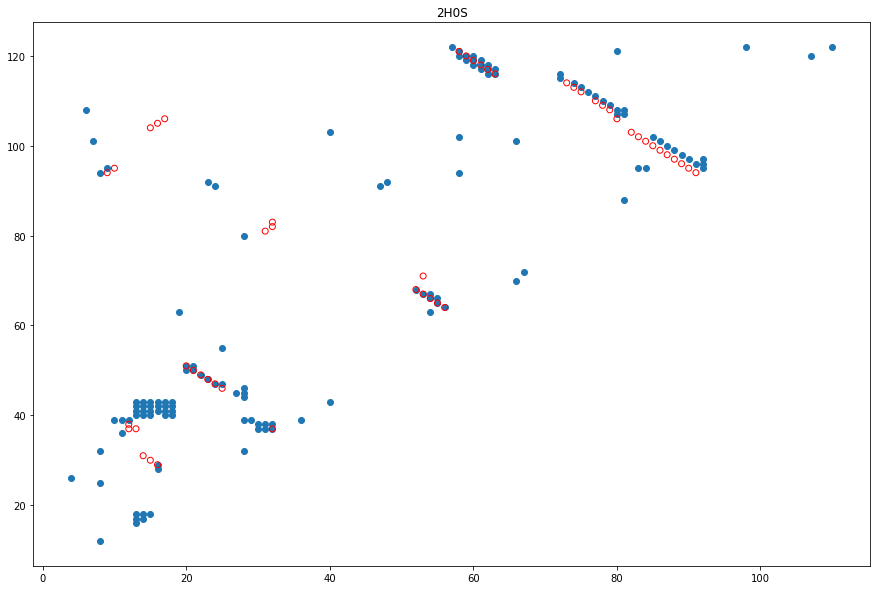

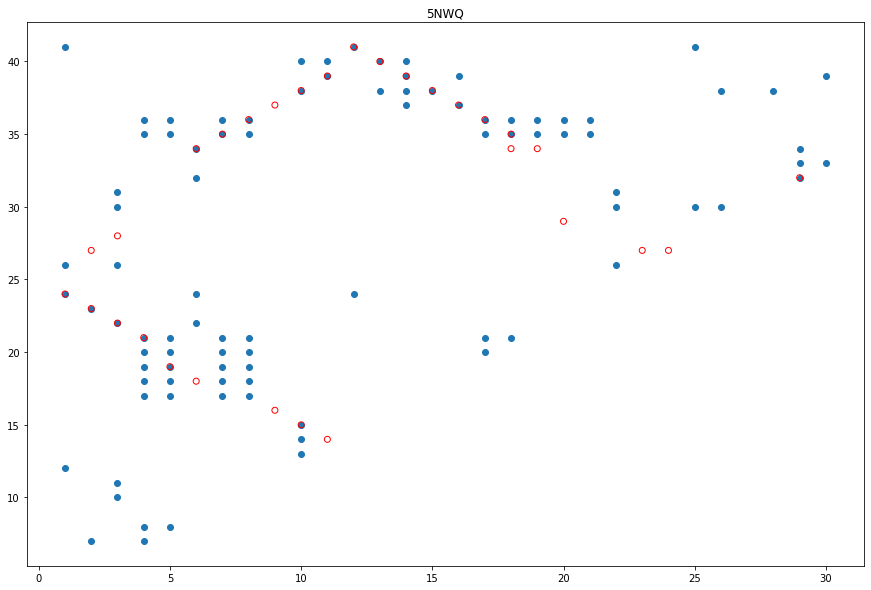

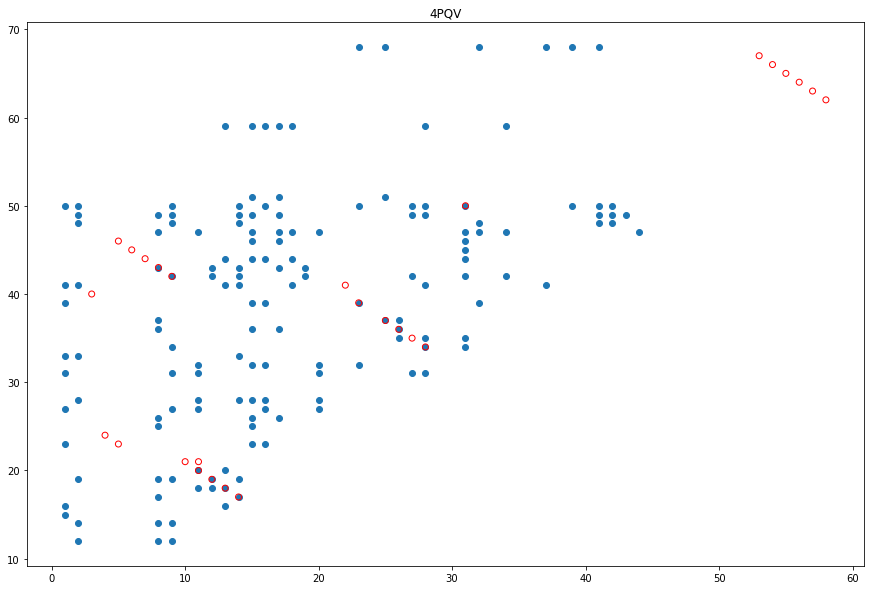

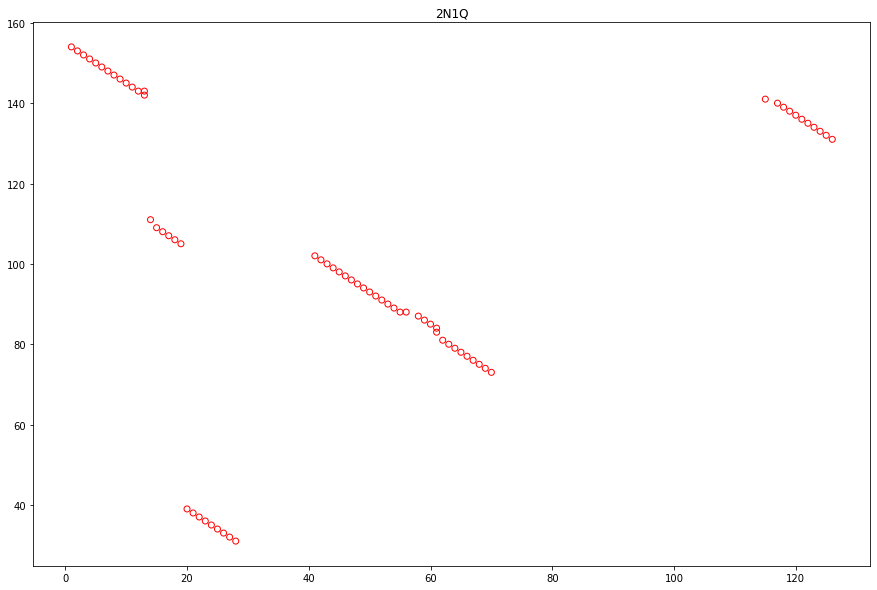

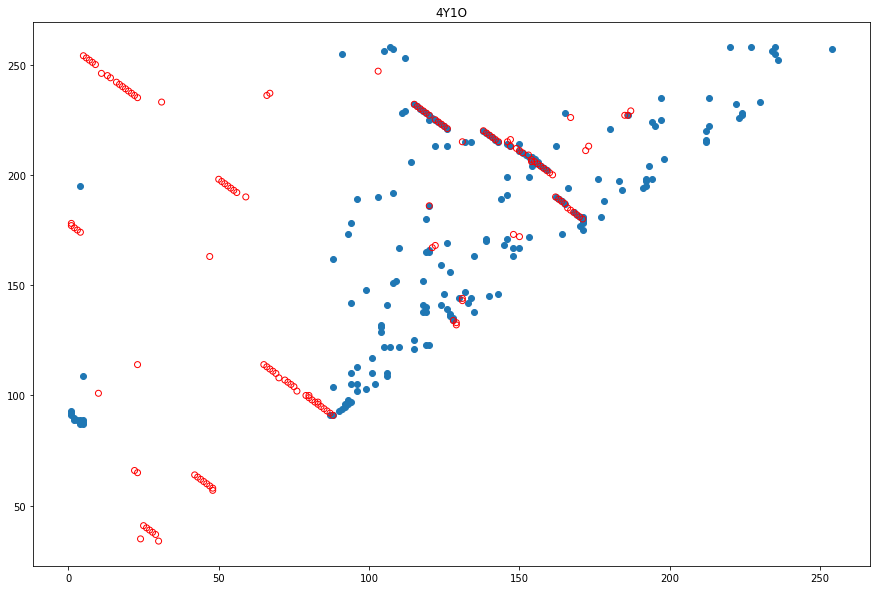

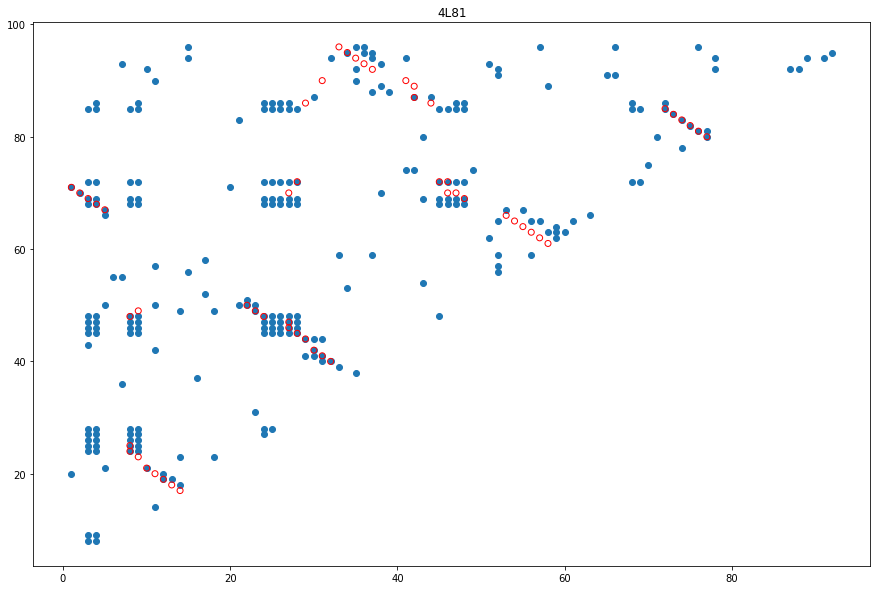

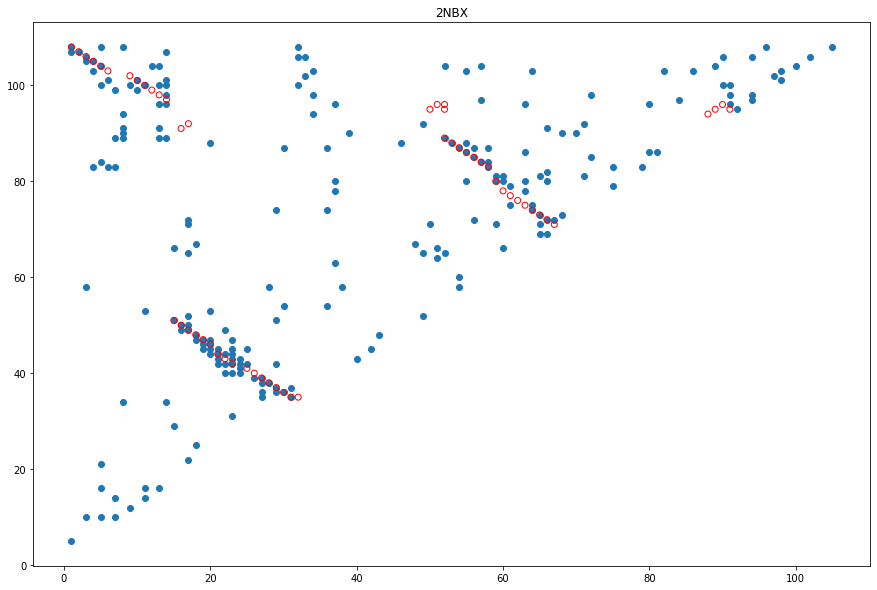

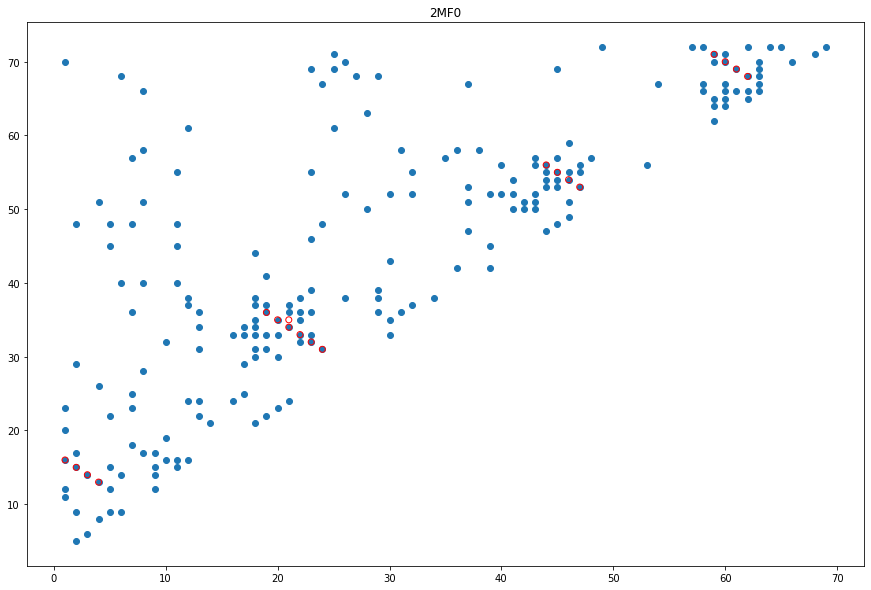

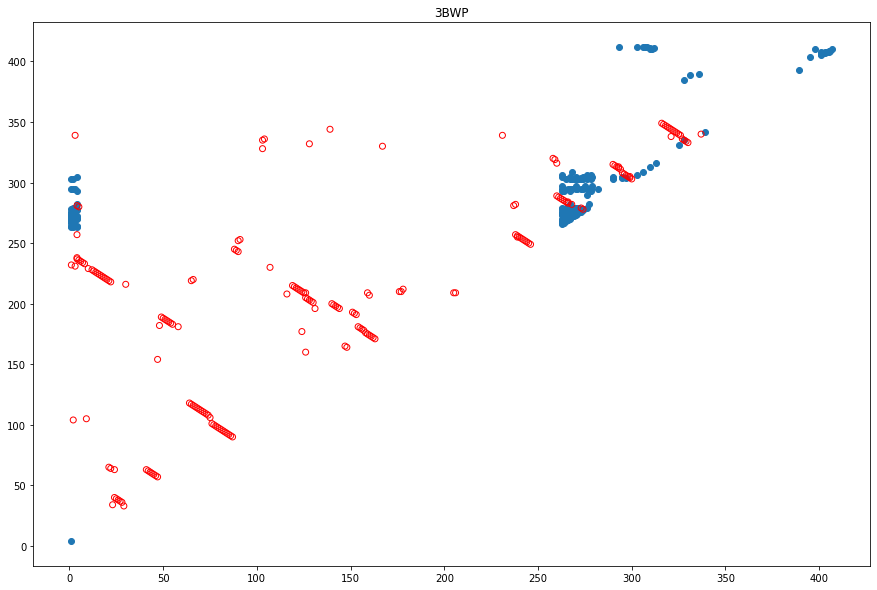

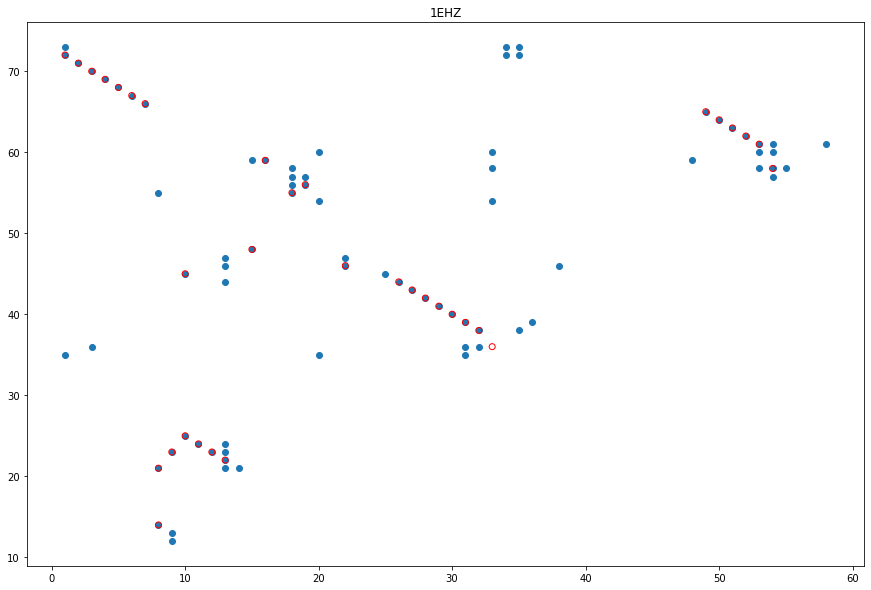

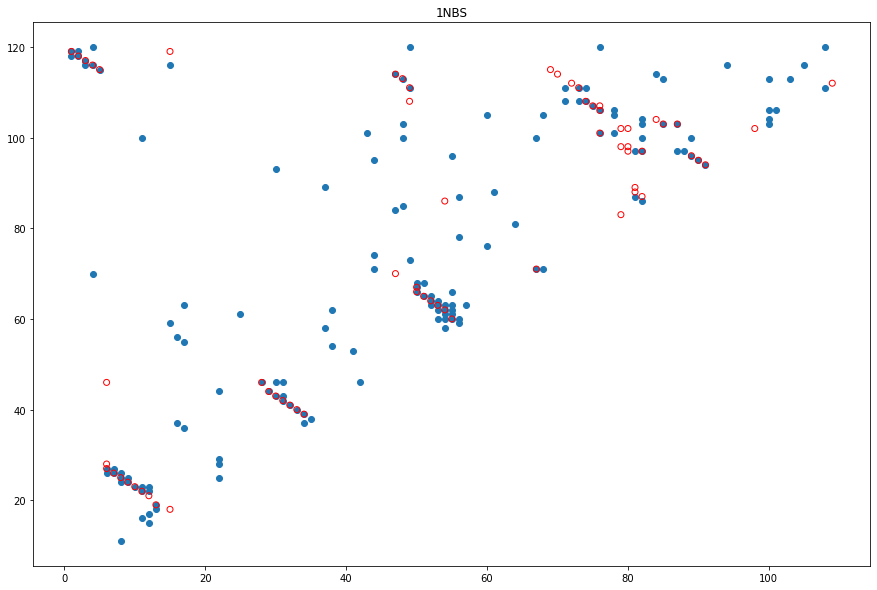

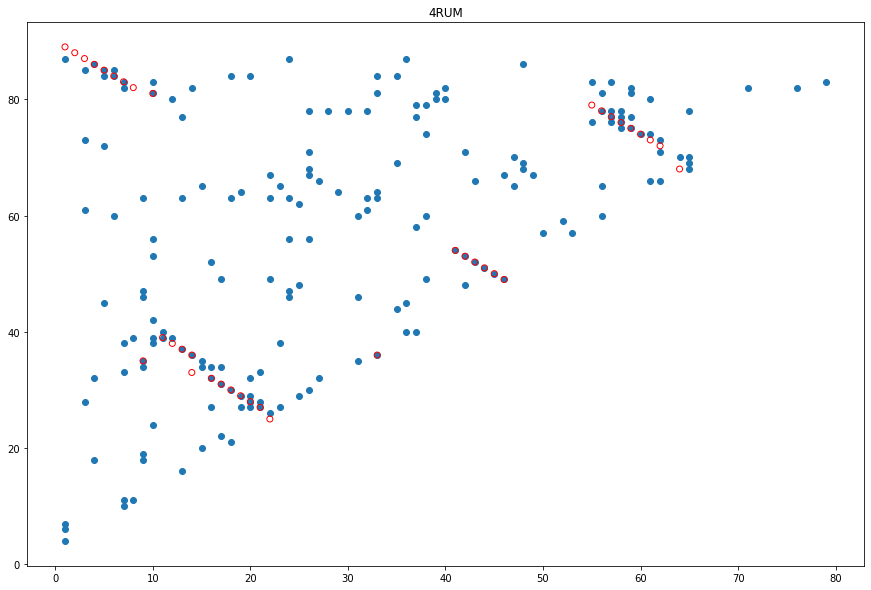

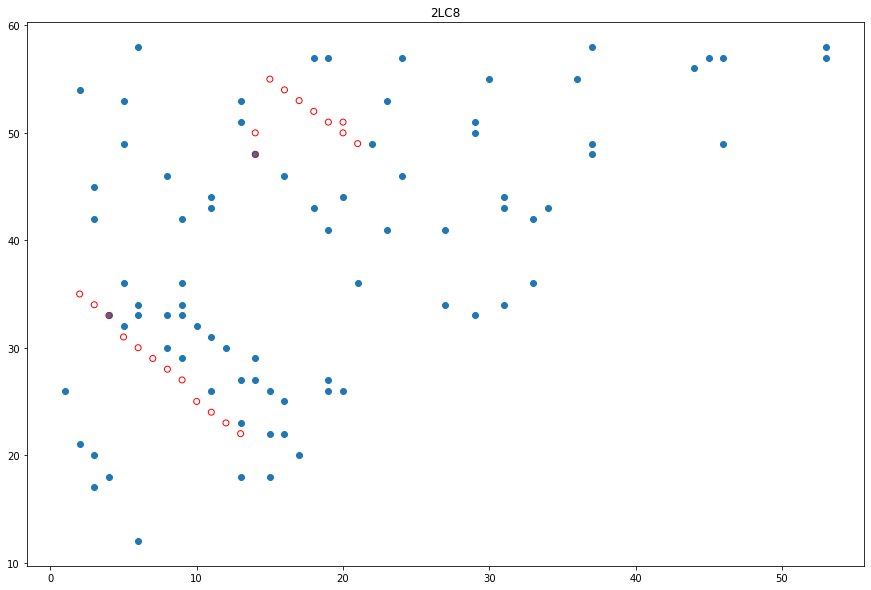

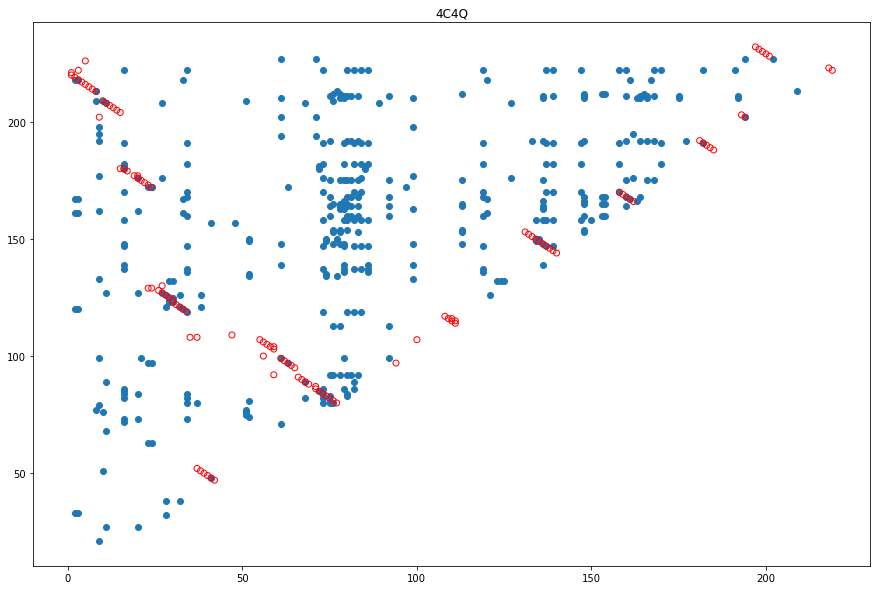

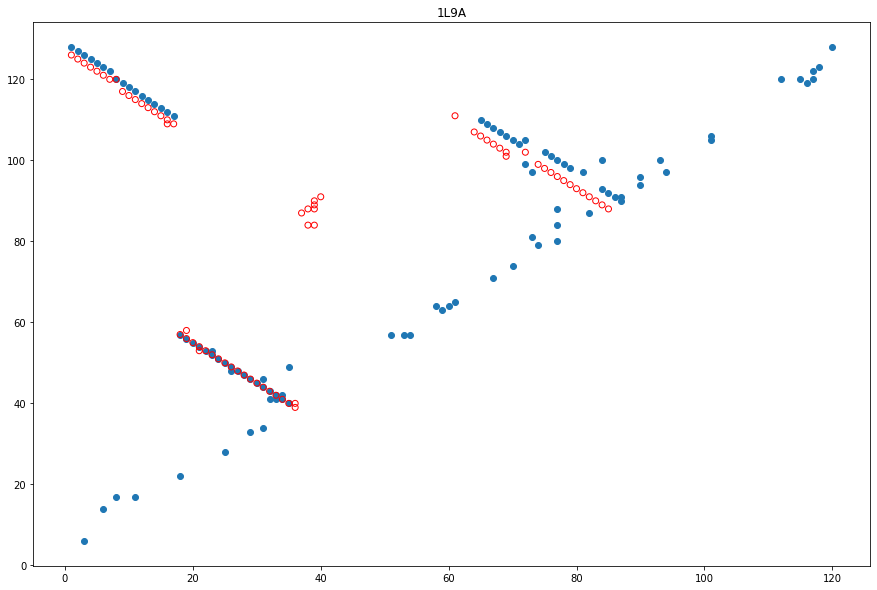

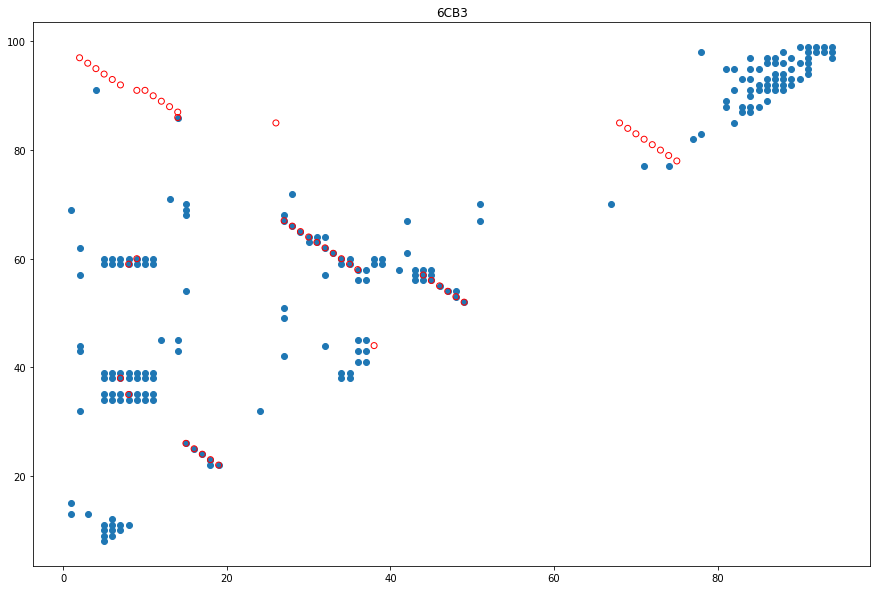

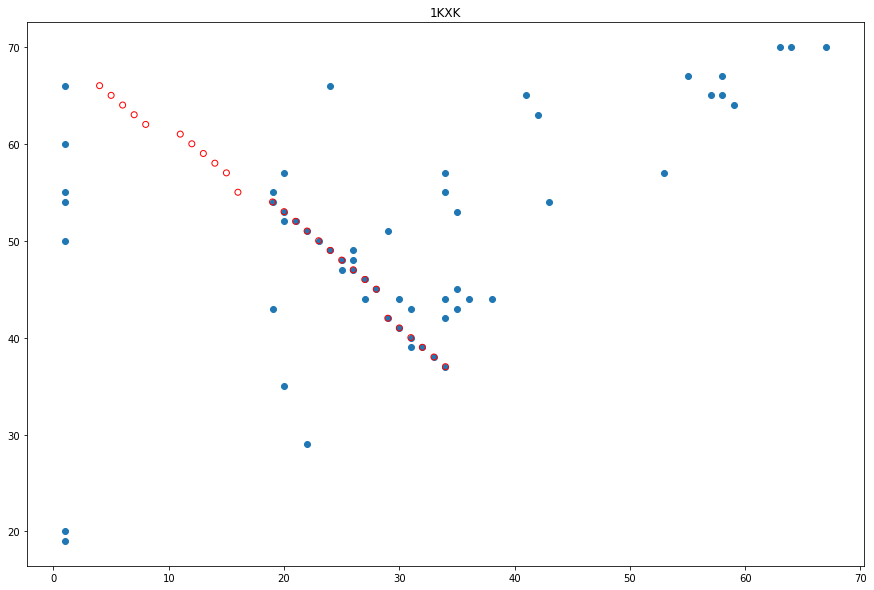

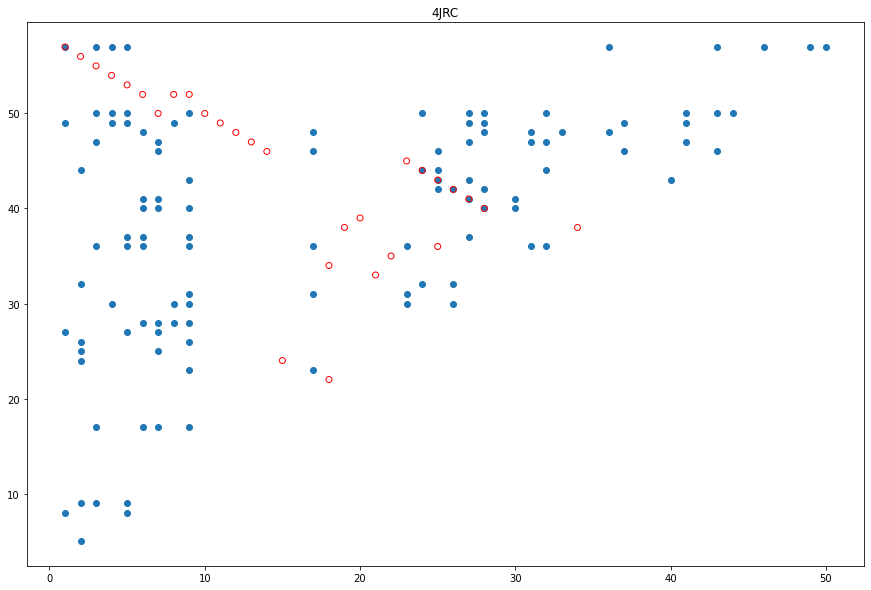

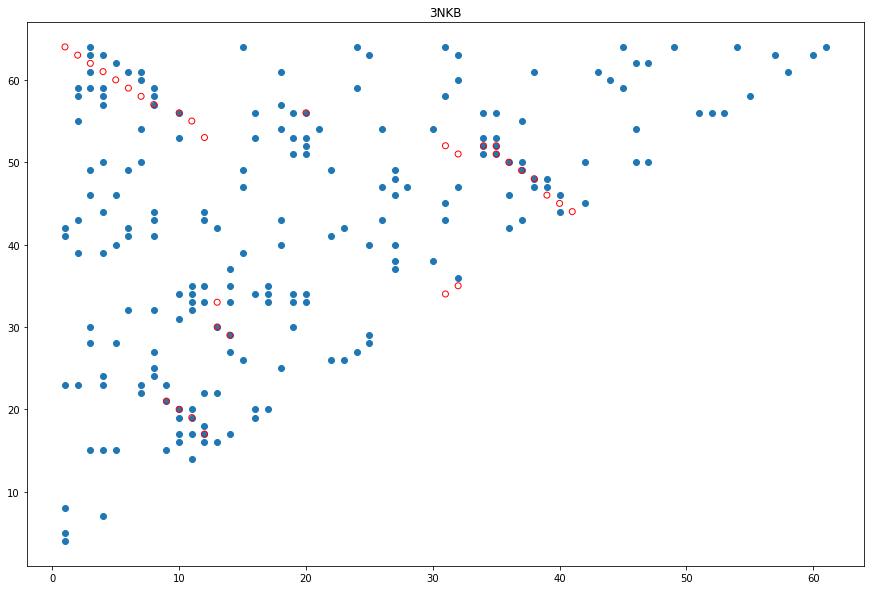

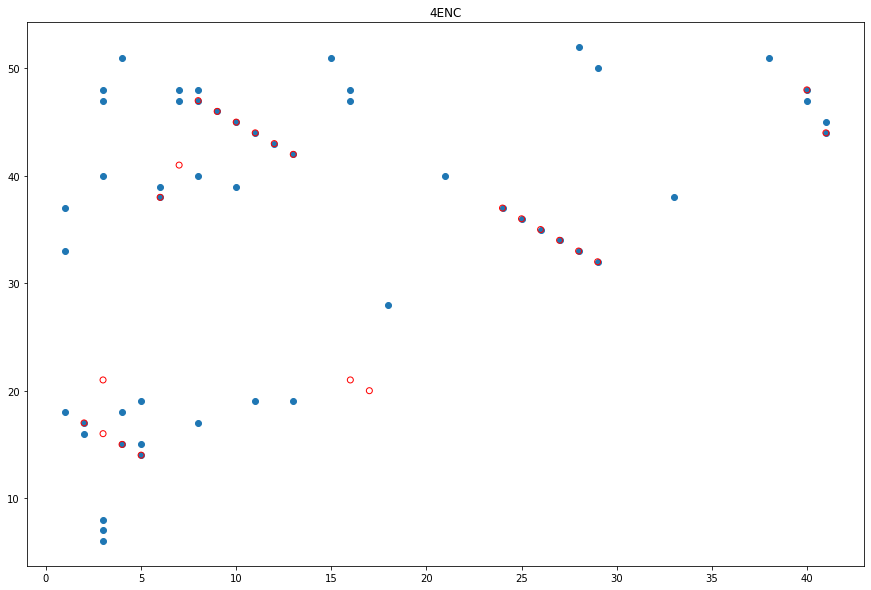

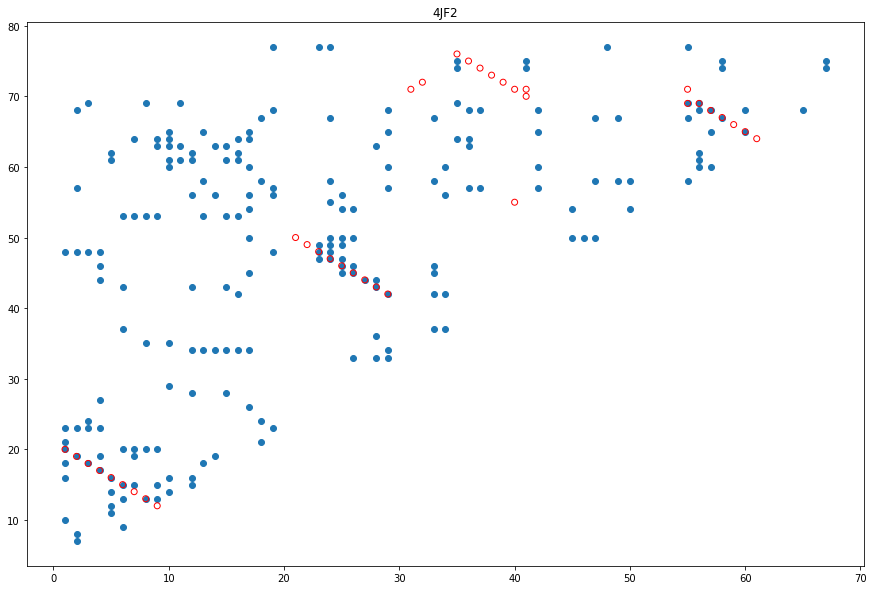

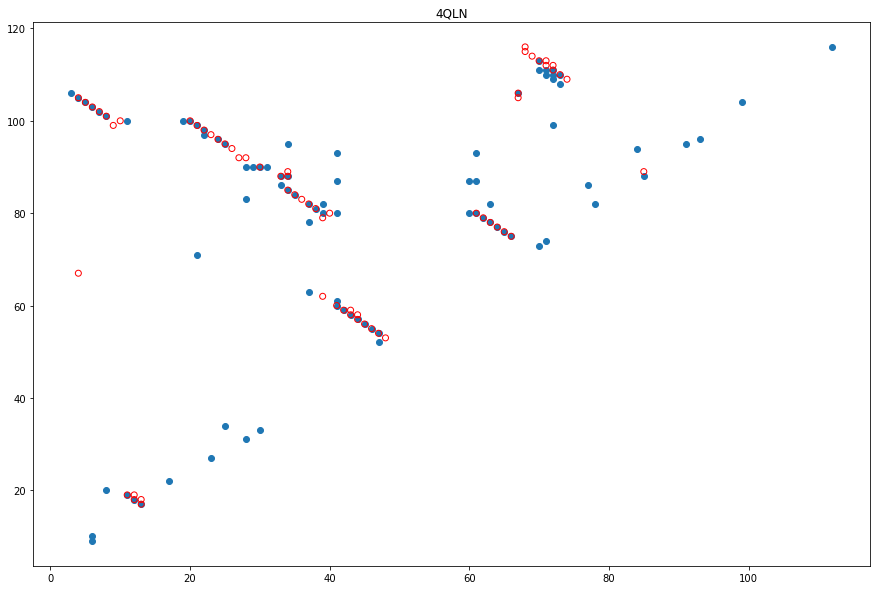

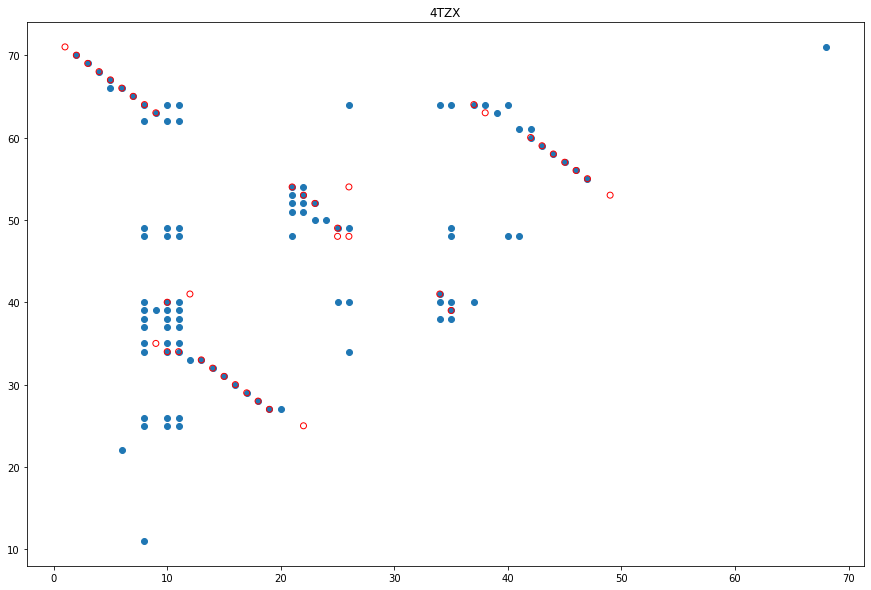

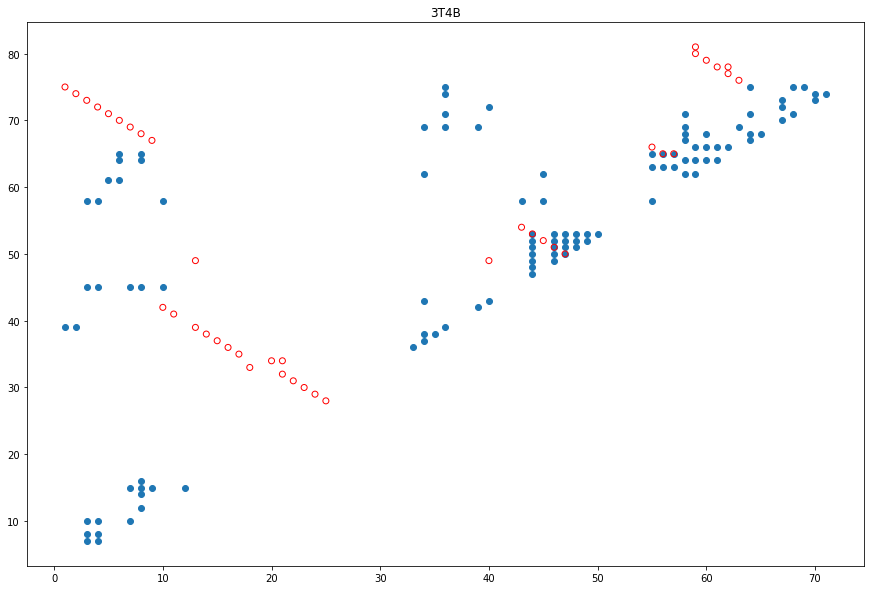

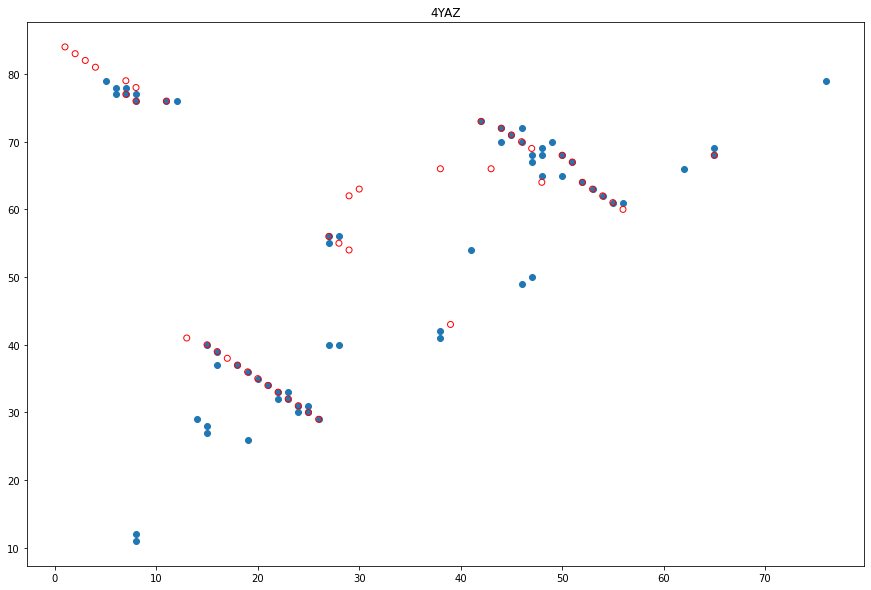

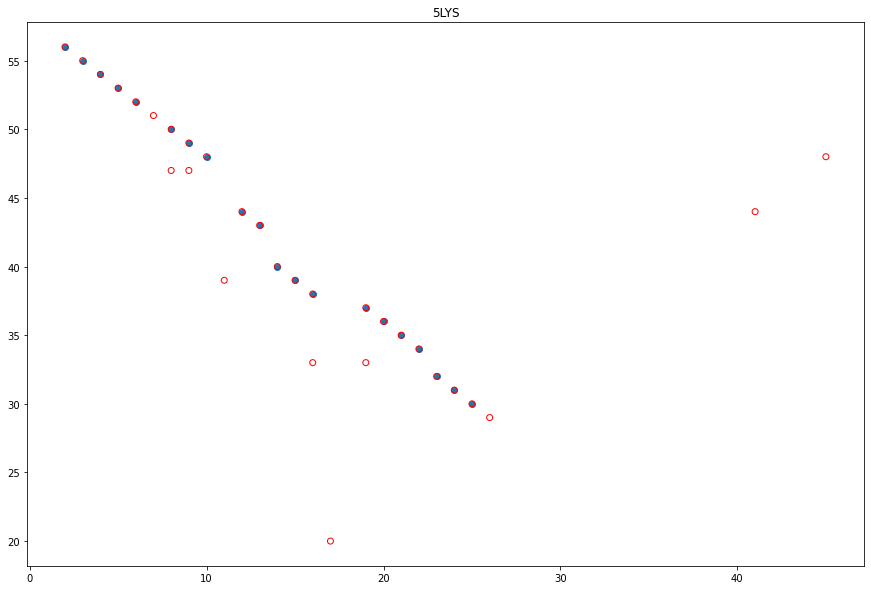

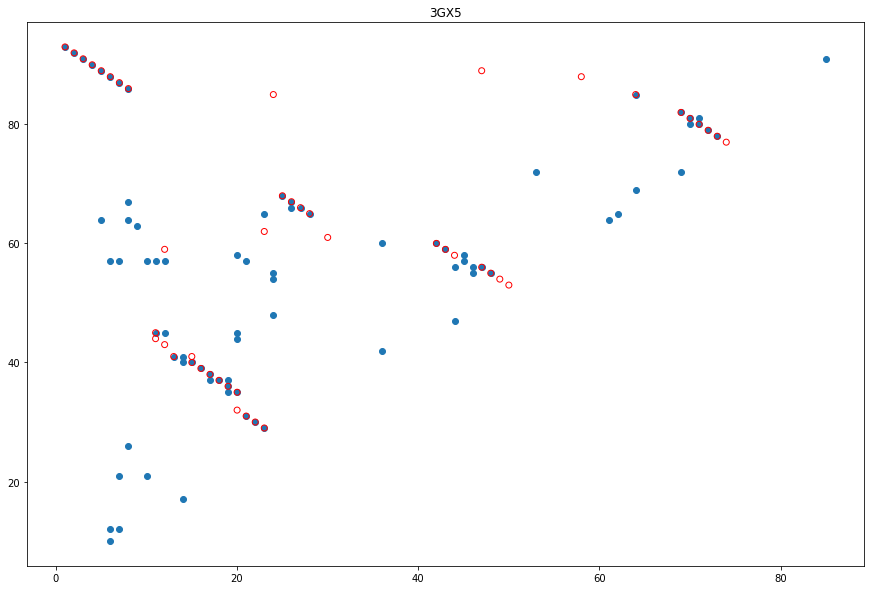

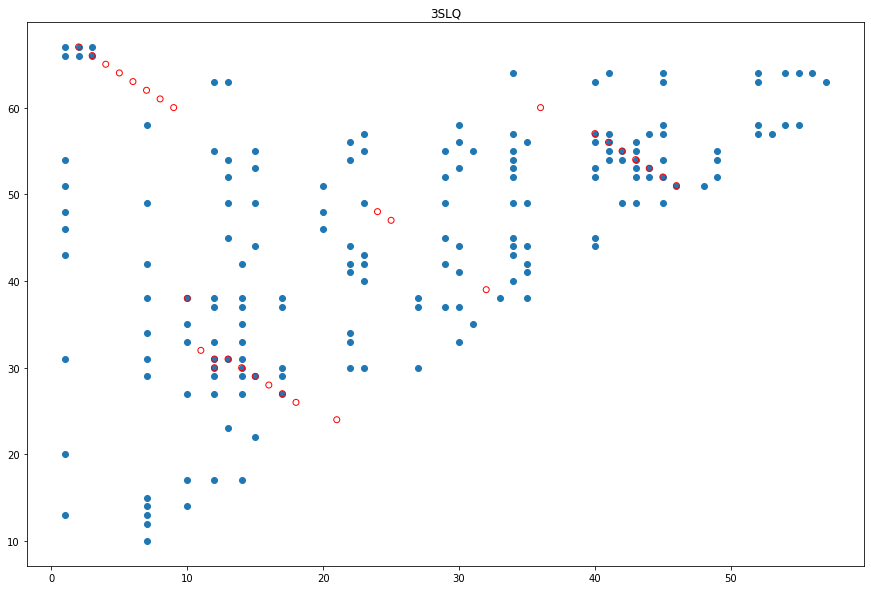

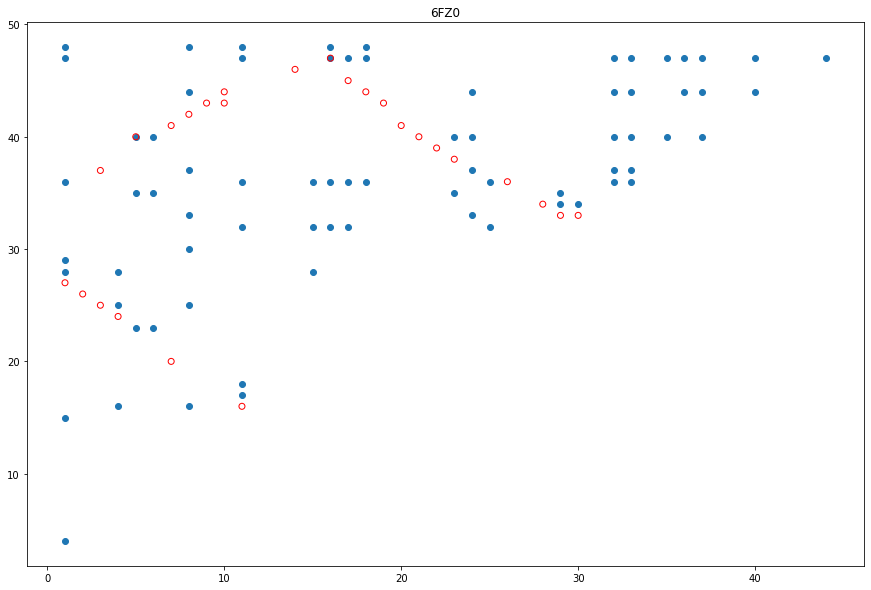

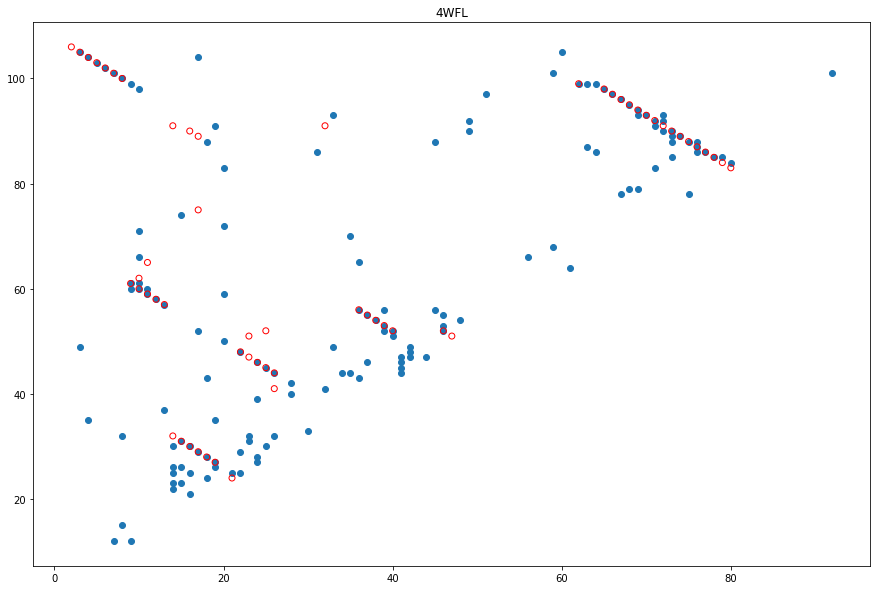

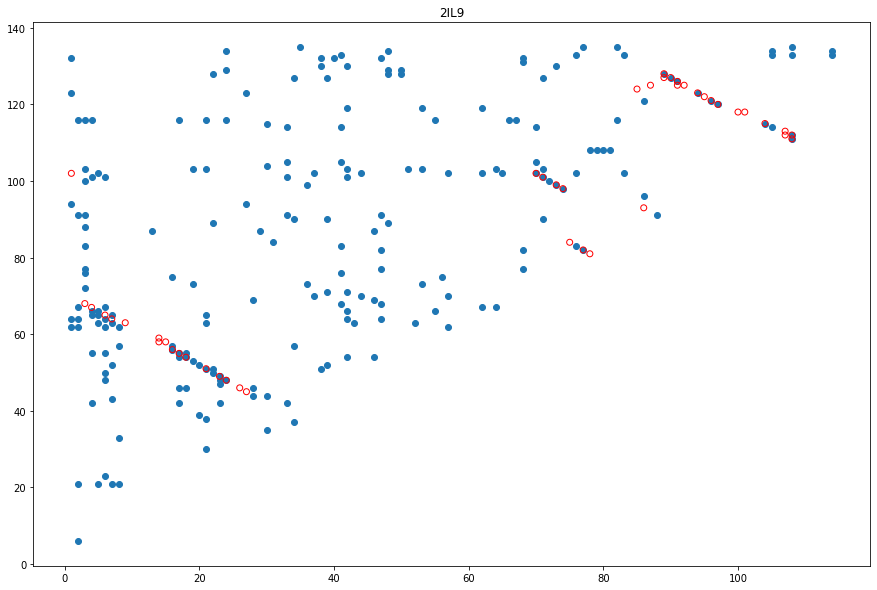

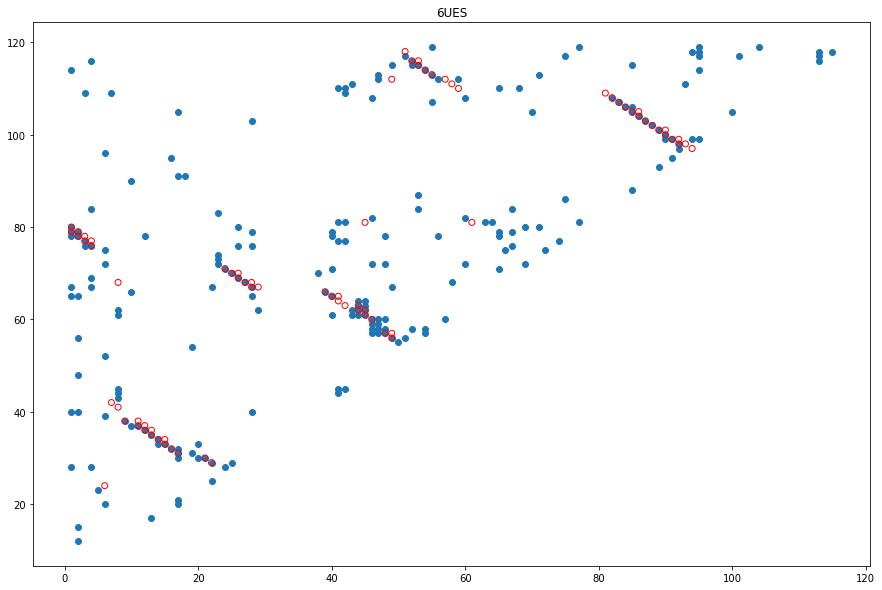

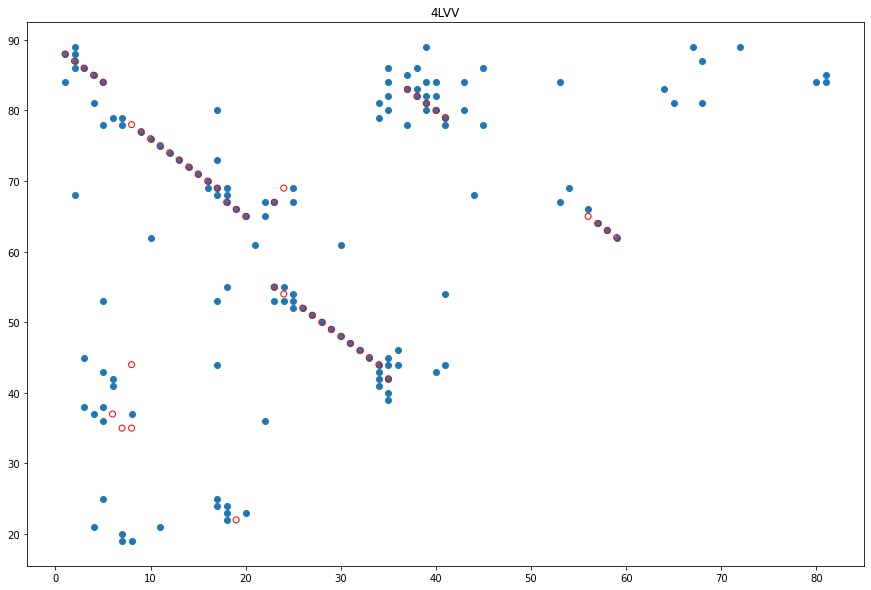

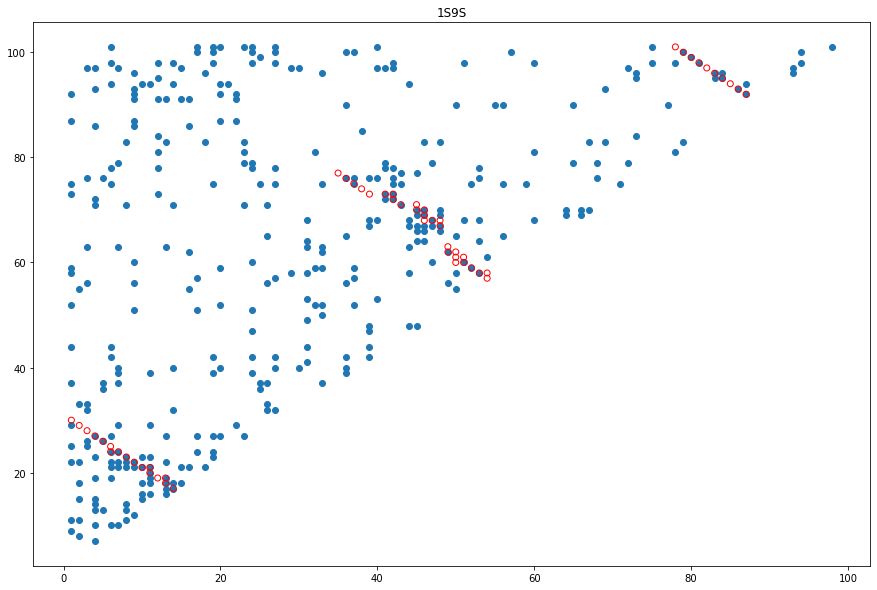

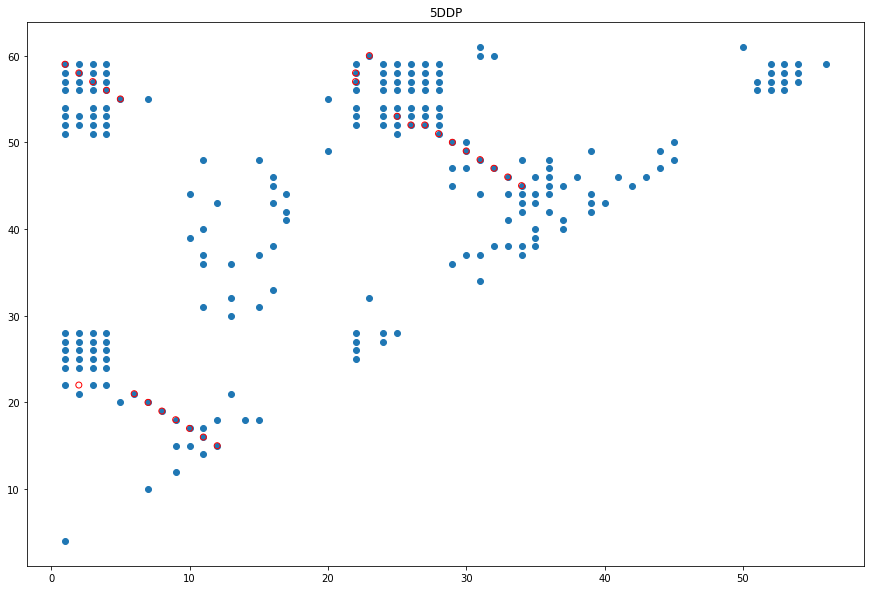

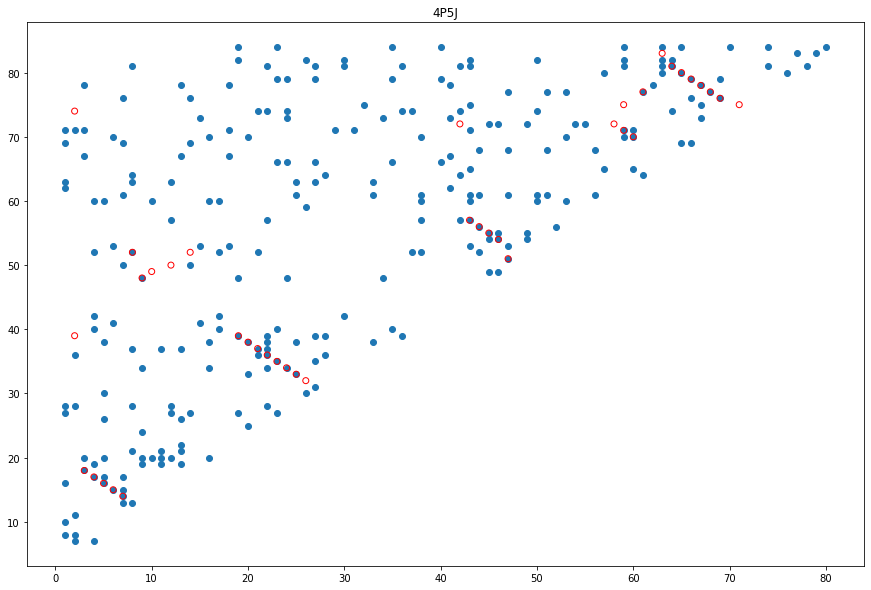

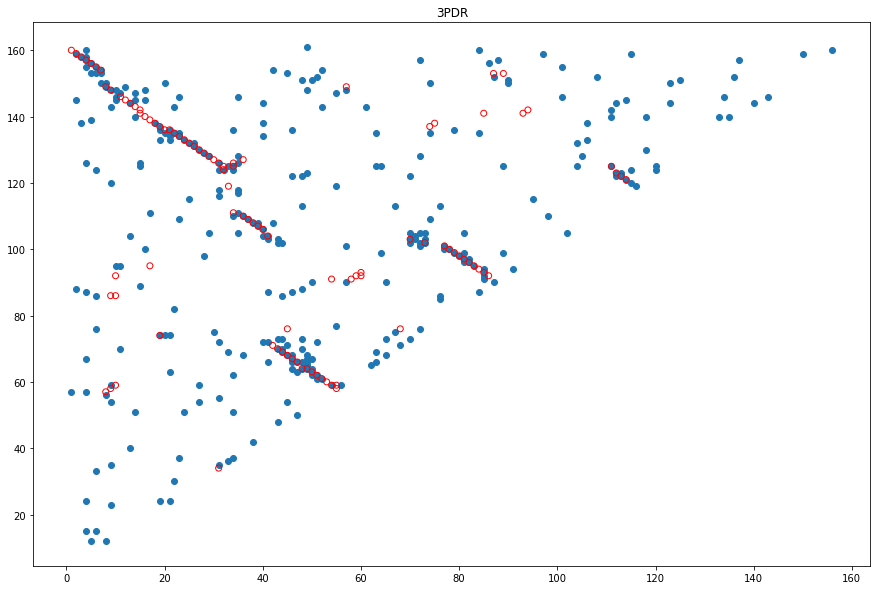

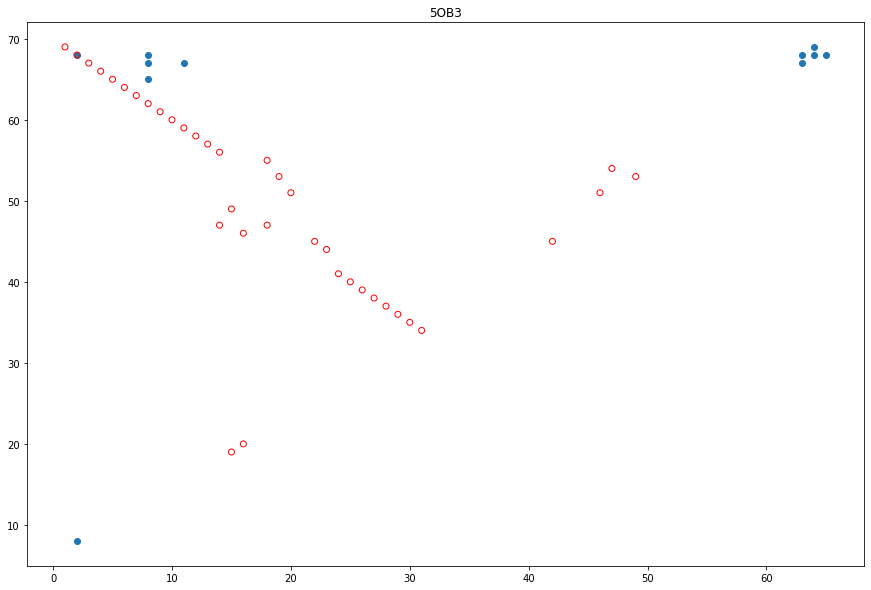

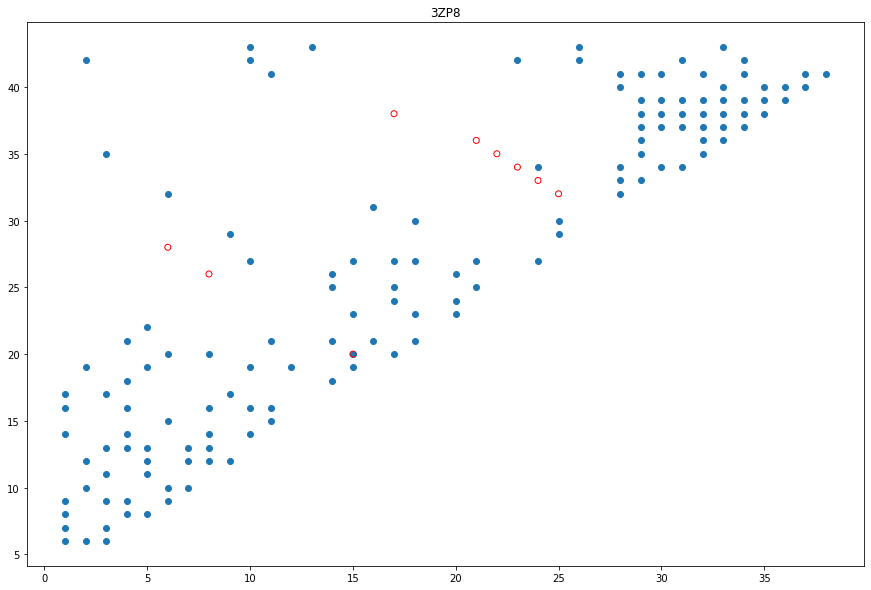

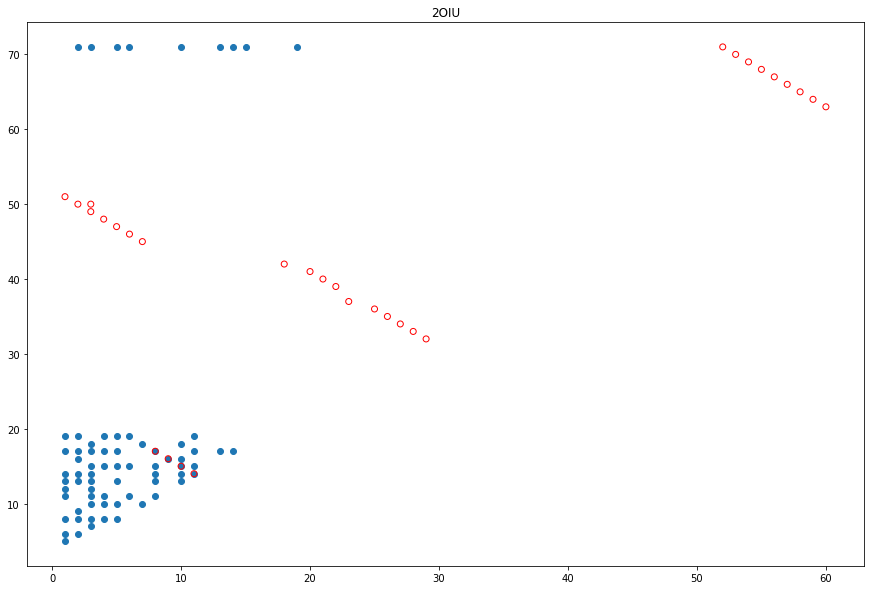

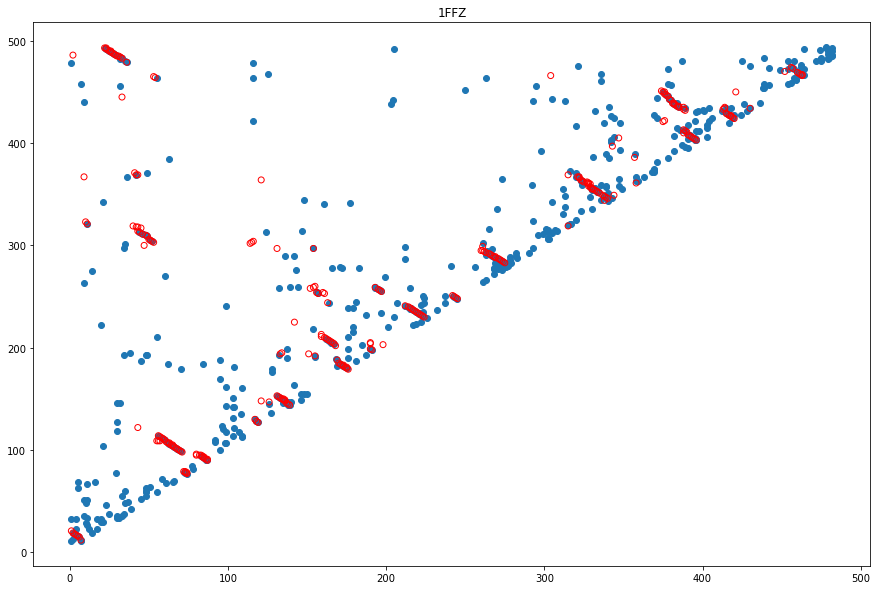

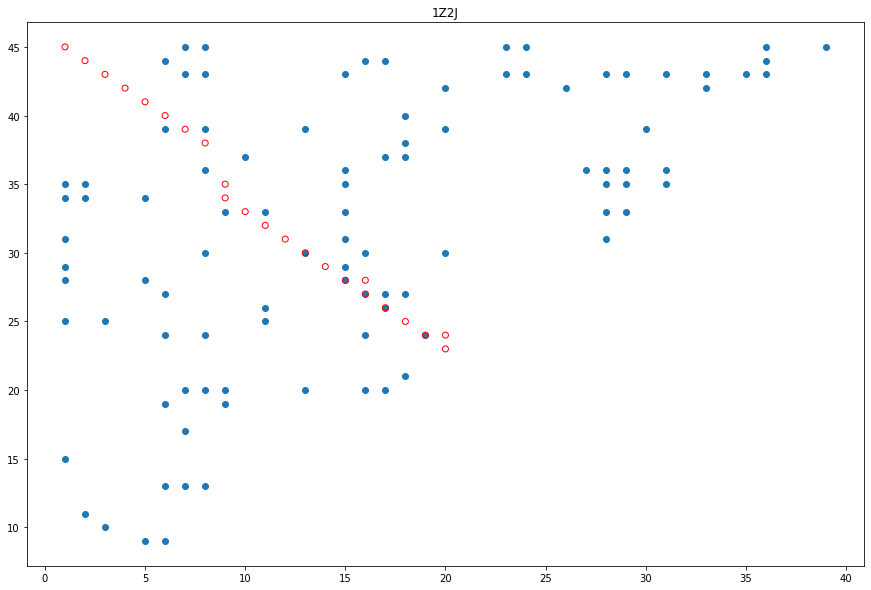

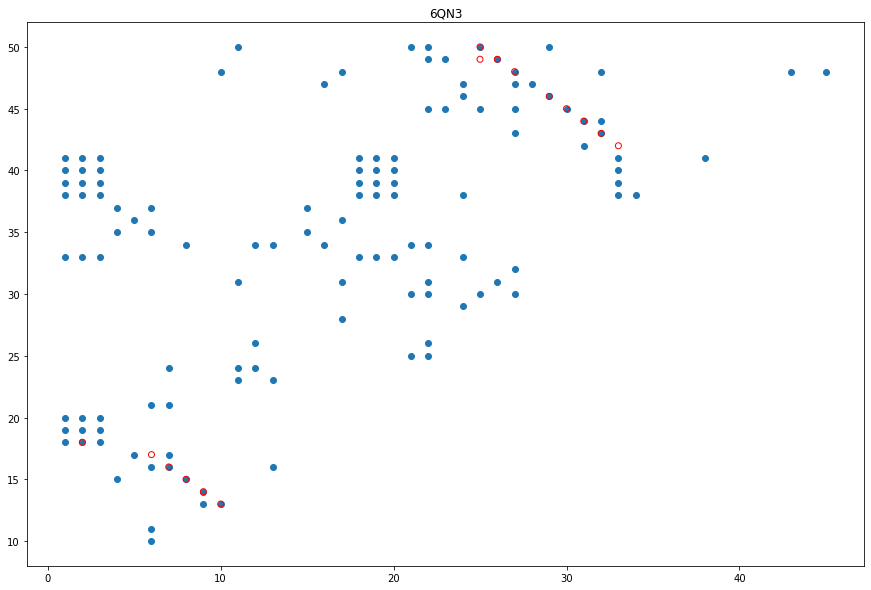

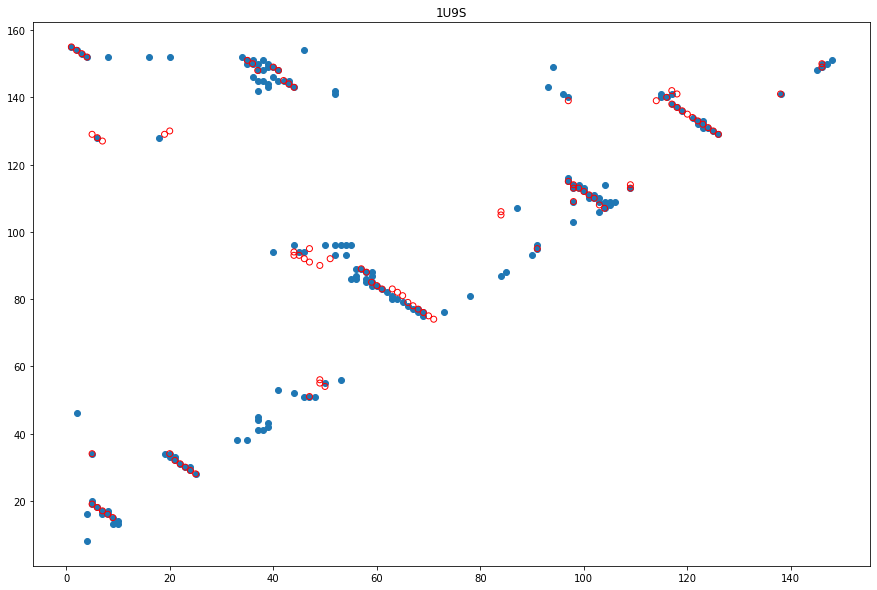

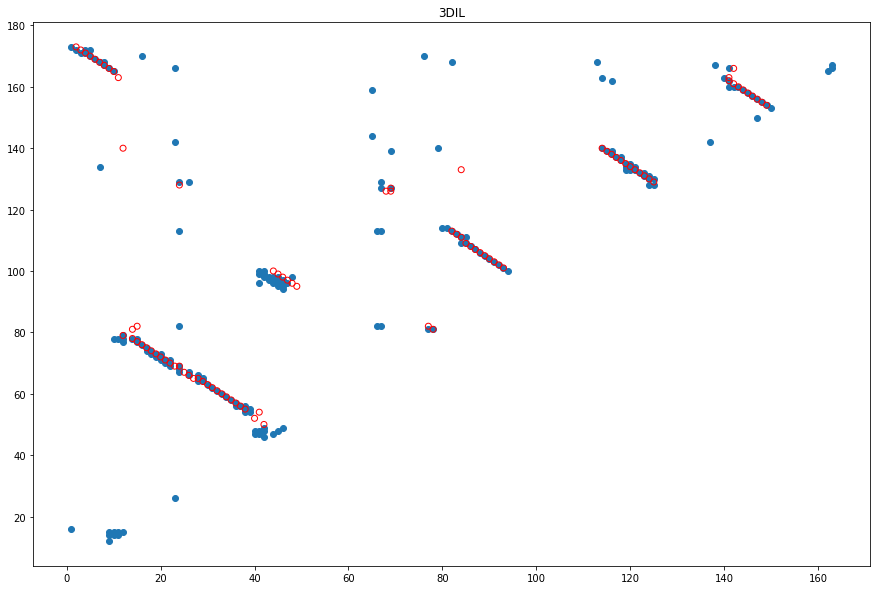

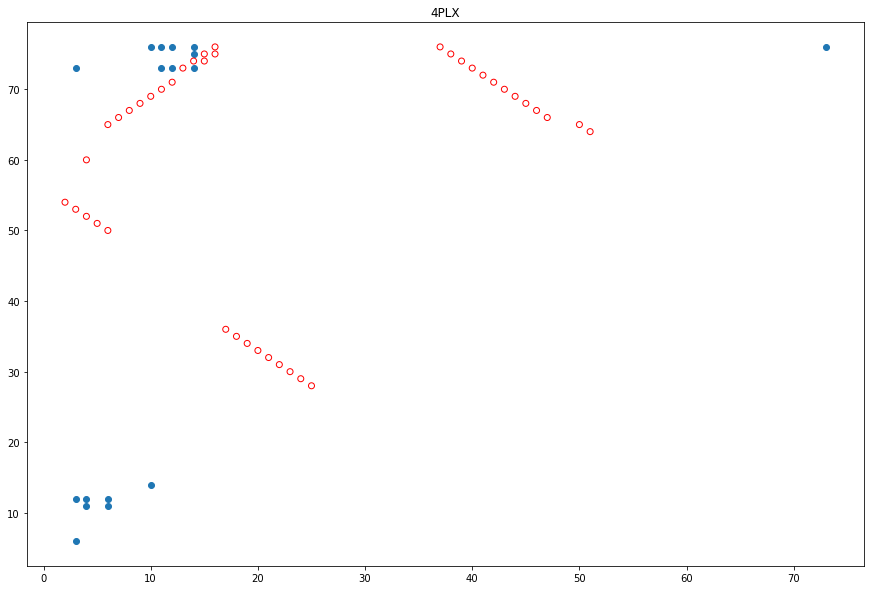

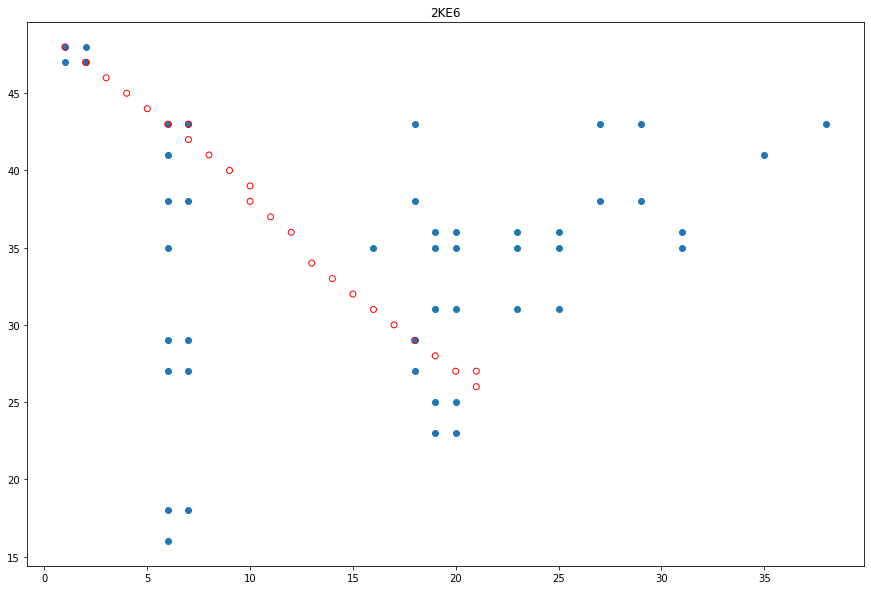

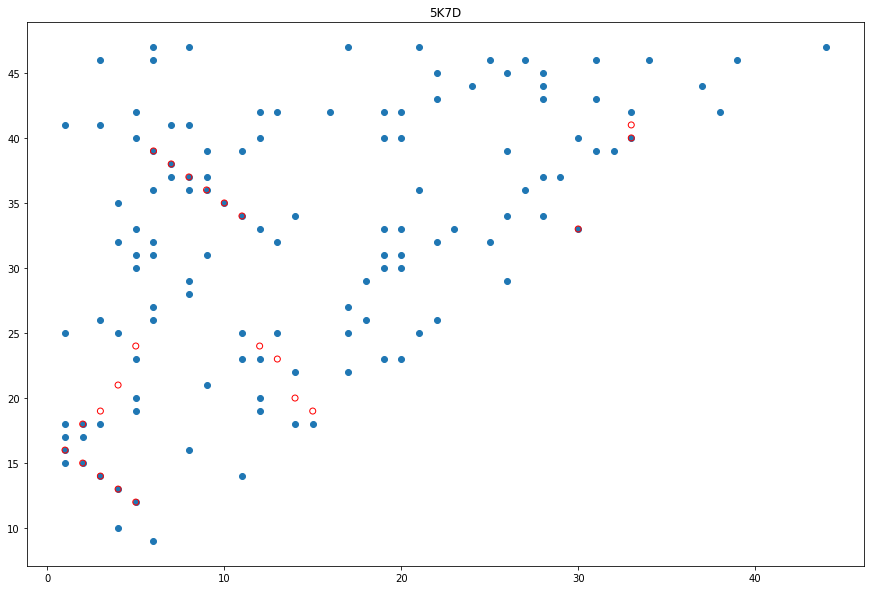

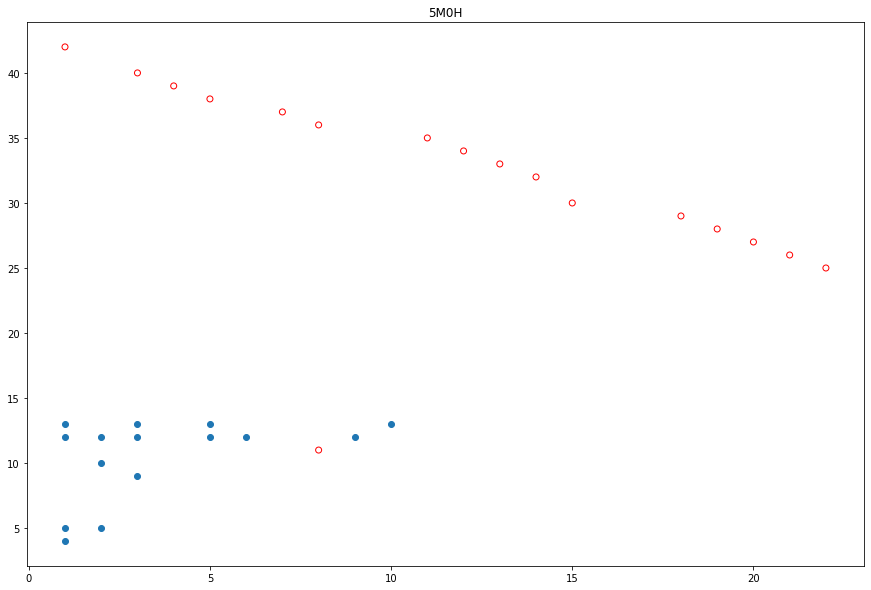

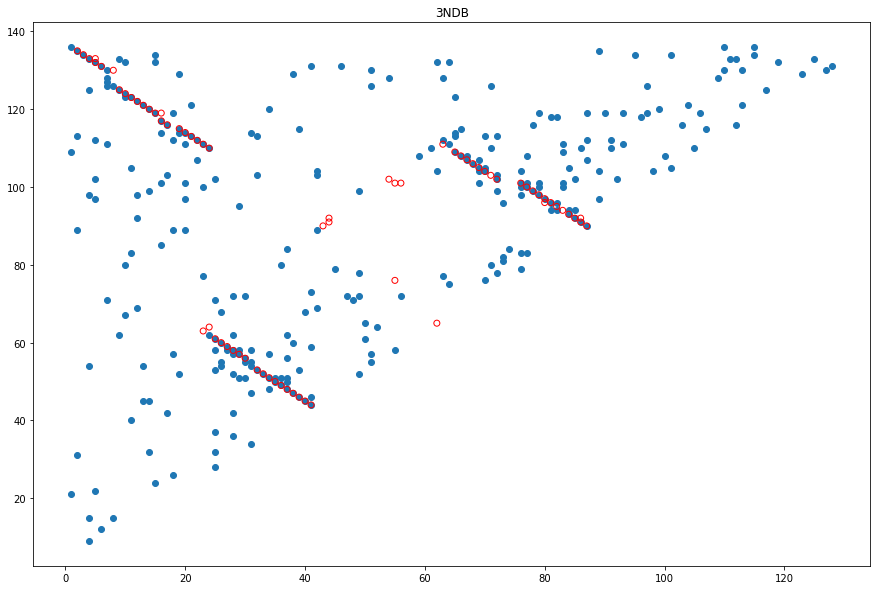

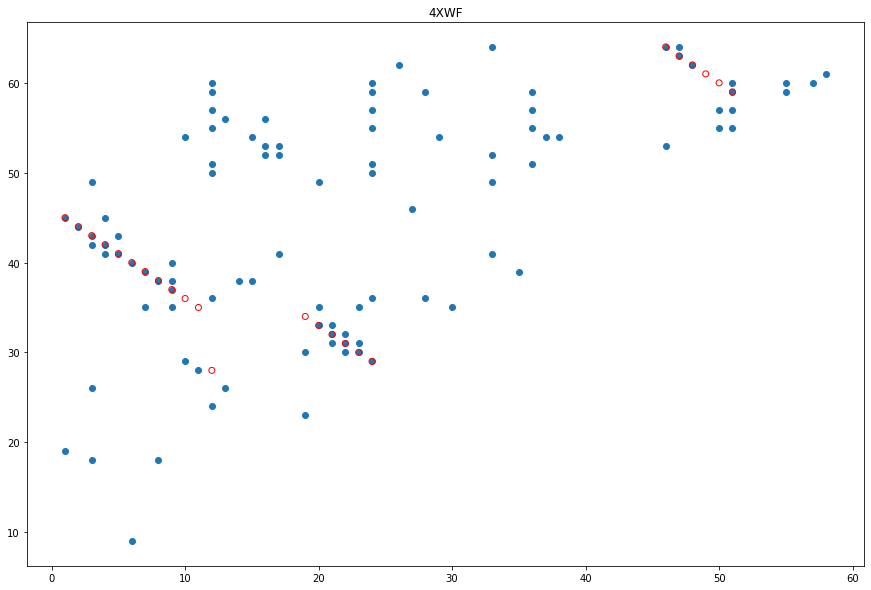

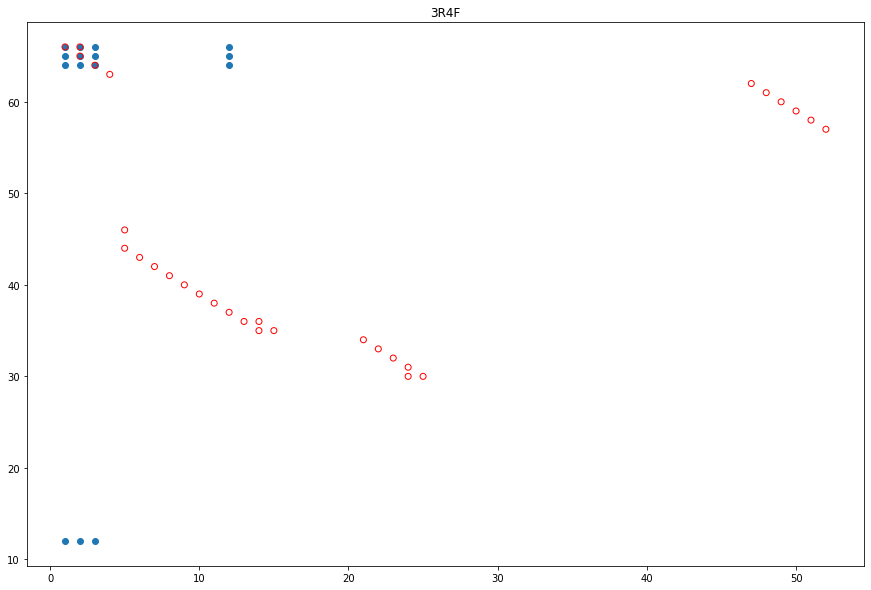

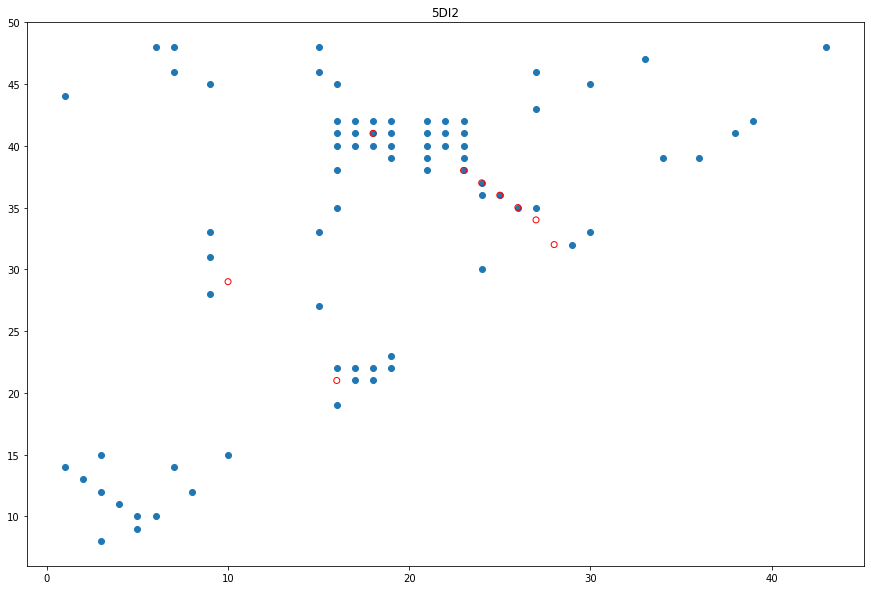

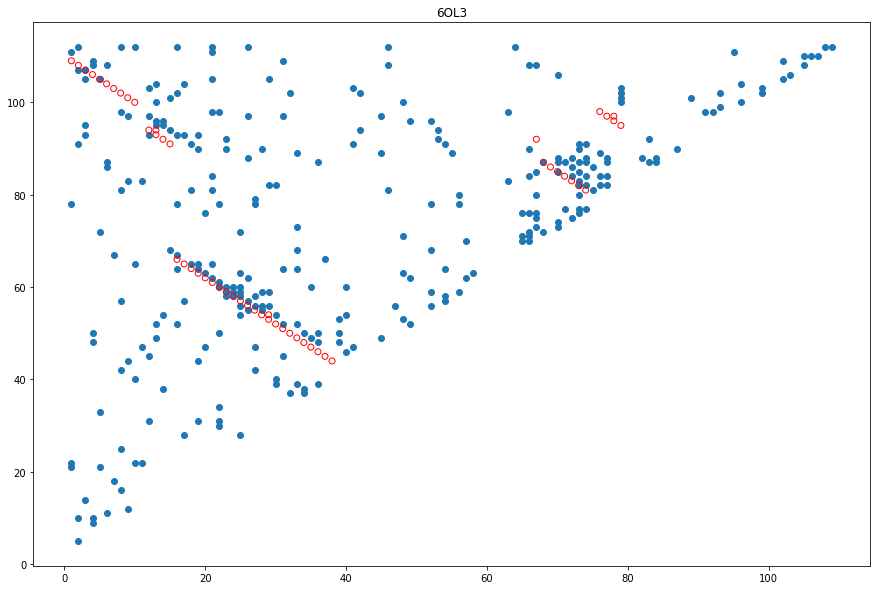

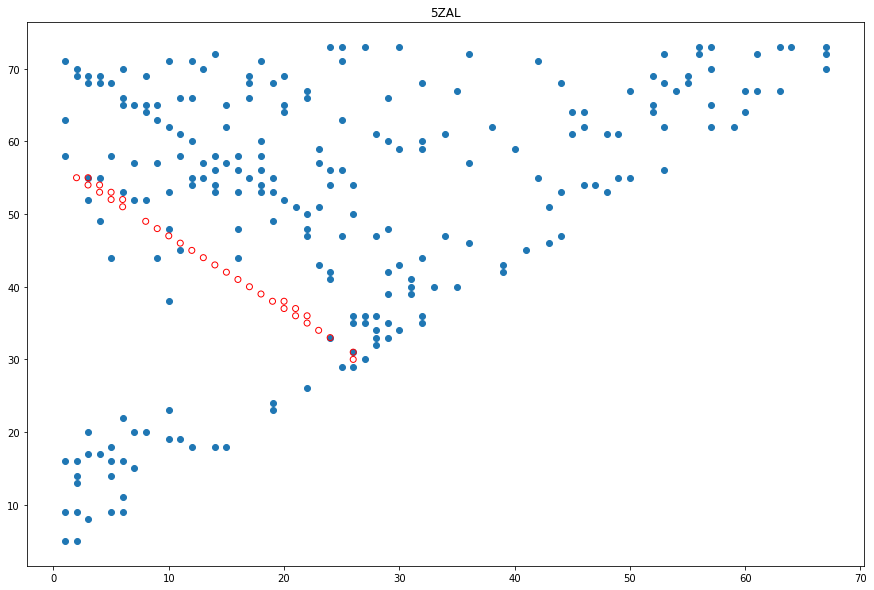

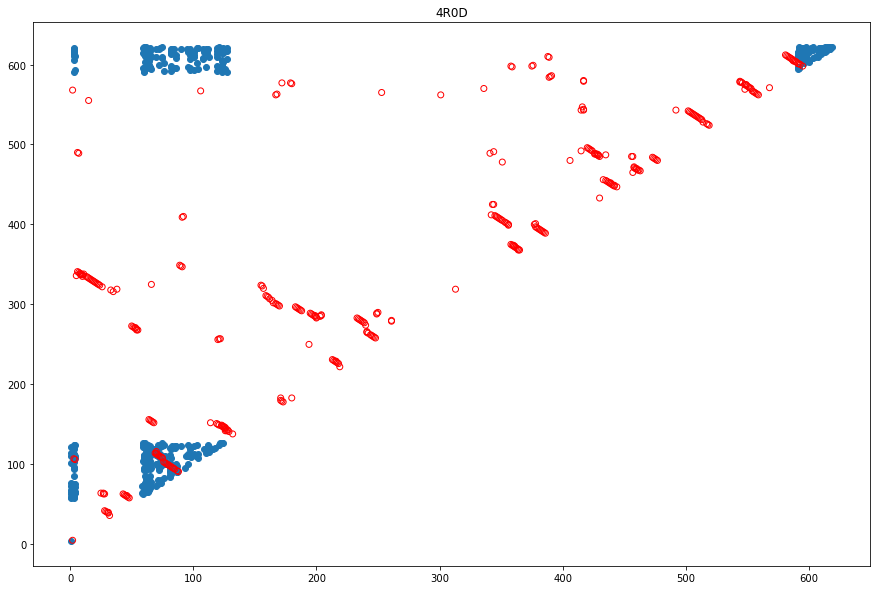

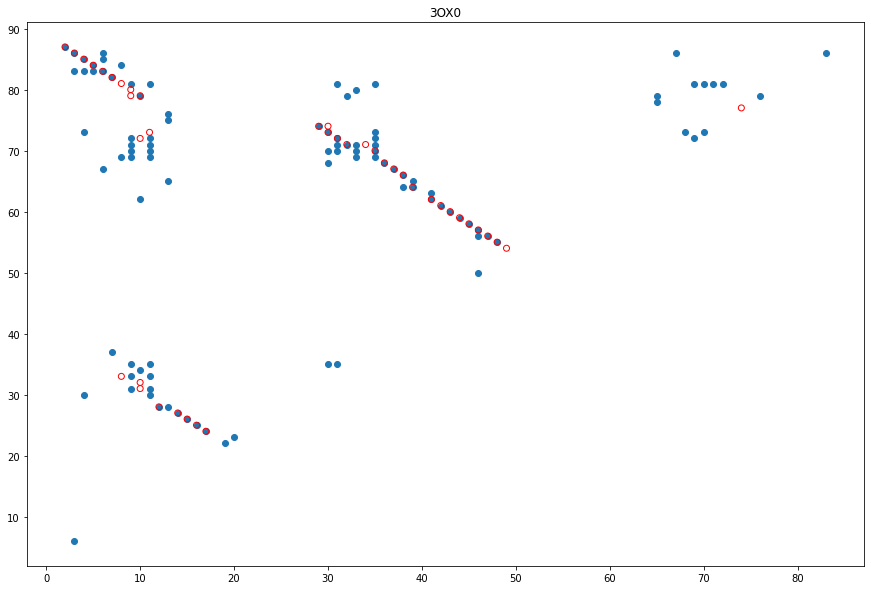

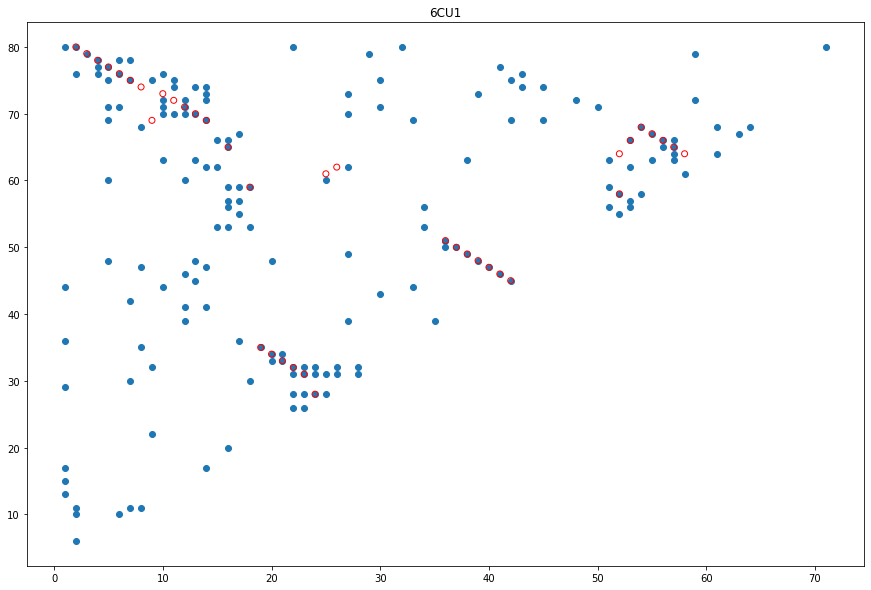

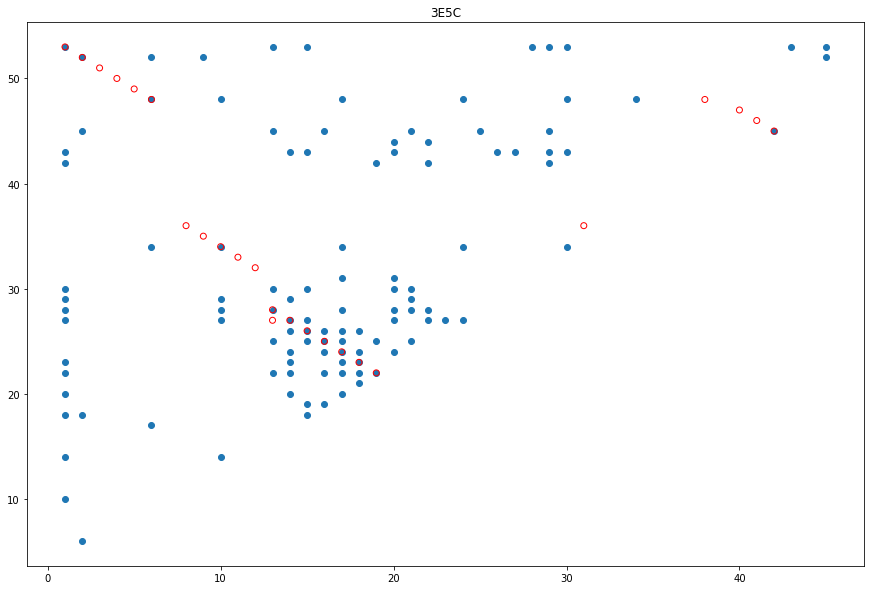

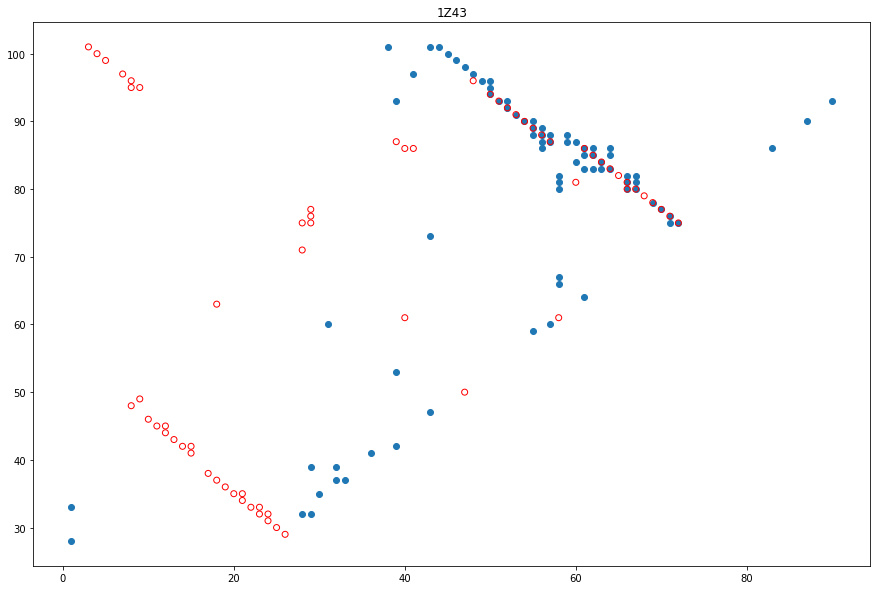

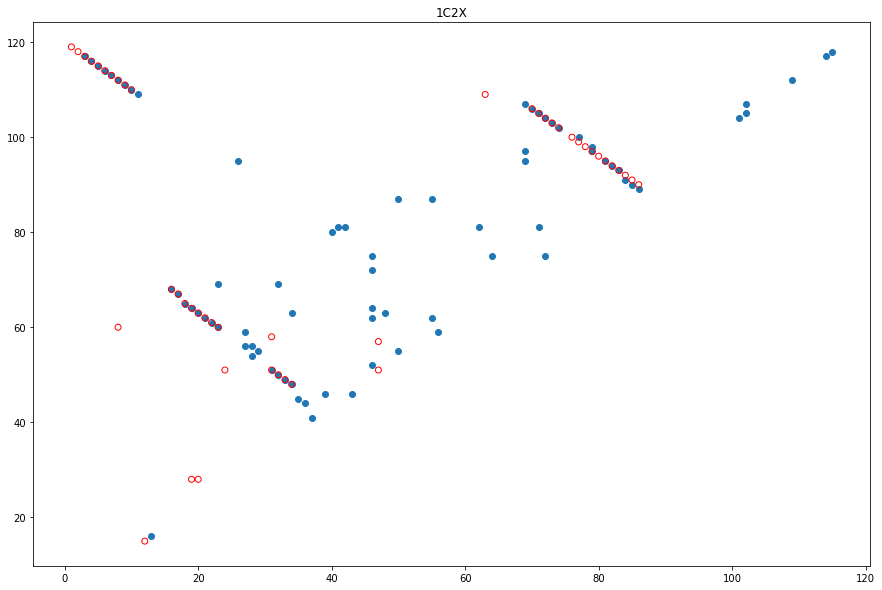

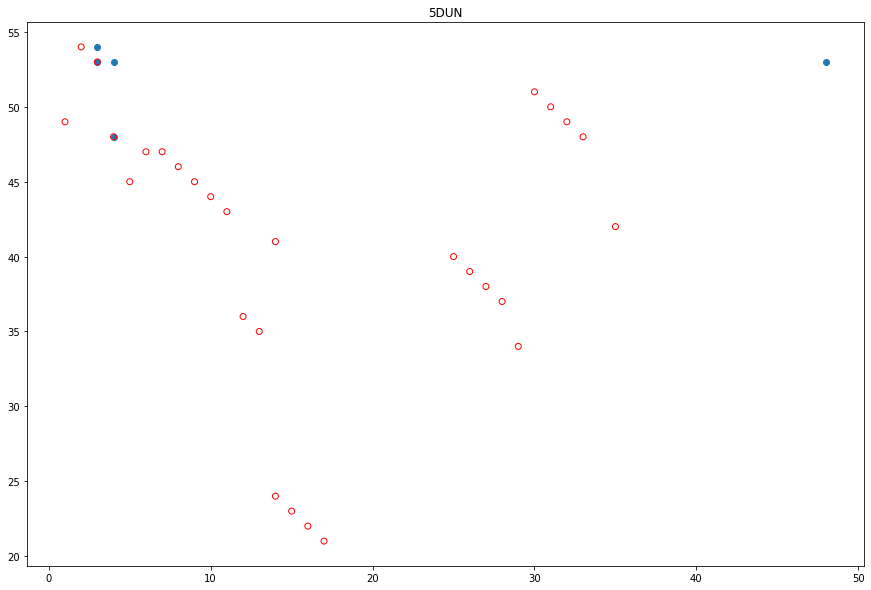

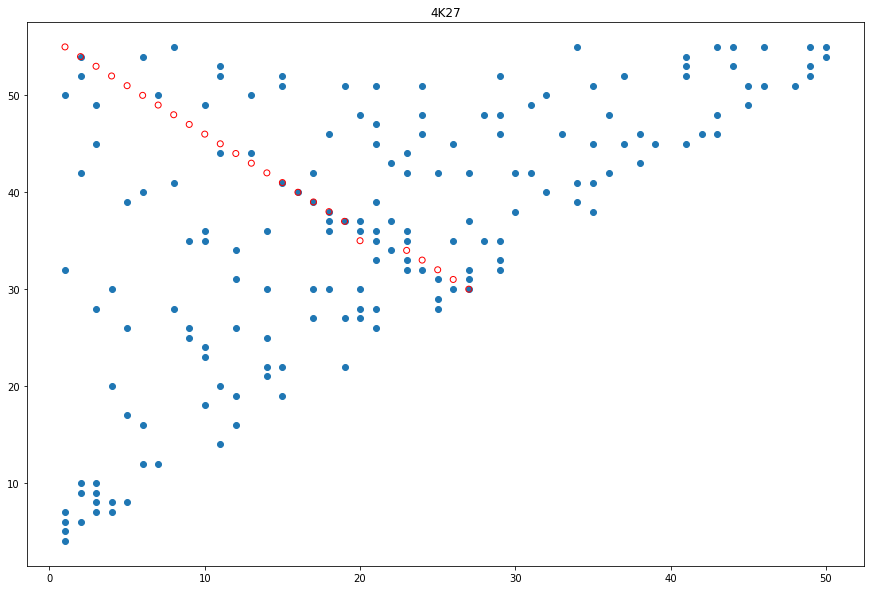

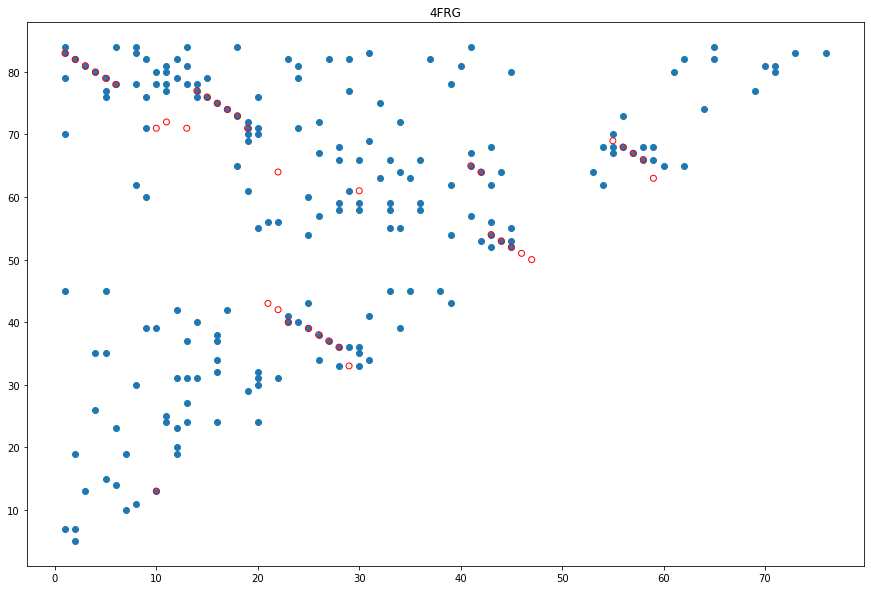

In [216]:
#myDF = df
myPdbs = df.pdb.unique()
print("myPdbs.shape = ",myPdbs.shape[0])
print(df.pdb.unique())
i = 1;
for myPdb in myPdbs:
    myDF = df[df['pdb']==myPdb]
    #print (myPdb)
    #print("myDF.shape = ",myDF.shape)
    plt.figure()
    plt.title(myPdb)
    #plt.subplot(myPdbs.shape[0], 1, i)
    #plt.subplots(figsize=(15,15))
    plt.scatter(myDF[myDF['dca_val']>.2]['i'],myDF[myDF['dca_val']>.2]['j'])
    plt.scatter(myDF[myDF['bond_type']>0]['i'],myDF[myDF['bond_type']>0]['j'], edgecolors='r', facecolors='none')
    i=i+1
    plt.show
    
# bad plots: 4RZD, 4P95, 4R4V, 2KRL, 1P6V, 2N1Q, 3BWP, 2LC8, 3T4B, 6FZ0, 3ZP8, 4PLX, 5M0H,  4R0D, 
# bad indexing: 4GMA, 5ZAL